In [55]:
import sys
import random
import numpy
import math
import matplotlib.pyplot as plt
import PIL
from PIL import Image, ImageDraw

from vlsi_design_automation import *

In [56]:
graph = undirected_graph('s27.bench')
graph.print_graph()

G0 (INPUT)	Adjacent Nodes:  G14(distance=8), 
G1 (INPUT)	Adjacent Nodes:  G12(distance=4), 
G2 (INPUT)	Adjacent Nodes:  G13(distance=3), 
G3 (INPUT)	Adjacent Nodes:  G16(distance=9), 
G17 (NOT)	Adjacent Nodes:  G11(distance=2), 
G5 (DFF)	Adjacent Nodes:  G10(distance=4), G11(distance=3), 
G10 (NOR2)	Adjacent Nodes:  G5(distance=4), G14(distance=1), G11(distance=5), 
G6 (DFF)	Adjacent Nodes:  G11(distance=9), G8(distance=8), 
G11 (NOR2)	Adjacent Nodes:  G6(distance=9), G17(distance=2), G10(distance=5), G5(distance=3), G9(distance=5), 
G7 (DFF)	Adjacent Nodes:  G13(distance=9), G12(distance=1), 
G13 (NOR2)	Adjacent Nodes:  G7(distance=9), G2(distance=3), G12(distance=6), 
G14 (NOT)	Adjacent Nodes:  G0(distance=8), G8(distance=4), G10(distance=1), 
G8 (AND2)	Adjacent Nodes:  G14(distance=4), G6(distance=8), G15(distance=9), G16(distance=4), 
G15 (OR2)	Adjacent Nodes:  G12(distance=9), G8(distance=9), G9(distance=9), 
G12 (NOR2)	Adjacent Nodes:  G15(distance=9), G1(distance=4), G7(distance

In [57]:
graph.print_adjacency_matrix()


Order: 
G0 - G1 - G2 - G3 - G17 - G5 - G10 - G6 - G11 - G7 - G13 - G14 - G8 - G15 - G12 - G16 - G9 - 
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 8, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 9, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 4, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 4, 0, 0, 5, 0, 0, 1, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 9, 0, 0, 0, 8, 0, 0, 0, 0]
[0, 0, 0, 0, 2, 3, 5, 9, 0, 0, 0, 0, 0, 0, 0, 0, 5]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 9, 0, 0, 0, 1, 0, 0]
[0, 0, 3, 0, 0, 0, 0, 0, 0, 9, 0, 0, 0, 0, 6, 0, 0]
[8, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 8, 0, 0, 0, 4, 0, 9, 0, 4, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 9, 0, 9, 0, 9]
[0, 4, 0, 0, 0, 0, 0, 0, 0, 1, 6, 0, 0, 9, 0, 0, 0]
[0, 0, 0, 9, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 4]
[0, 0, 0, 0, 0, 0, 0, 0, 5, 0, 0, 0, 0, 9, 0, 4, 0]


In [58]:
graph.bfs('G0')

Breadth first search of the graph with  G0  as the starting node is: 
G0(0)-> G14(1)-> G8(2)-> G10(2)-> G6(3)-> G15(3)-> G16(3)-> G5(3)-> G11(3)-> G12(4)-> G9(4)-> G3(4)-> G17(4)-> G1(5)-> G7(5)-> G13(5)-> G2(6)-> 

In [59]:
graph.dfs('G0')

Depth first search of the graph with  G0  as the starting node is: 
G0-> G14-> G8-> G6-> G11-> G17-> G10-> G5-> G9-> G16-> G3-> G15-> G12-> G1-> G7-> G13-> G2-> 

In [60]:
graph.dijsktra_shortest_path('G0')

Shortest path to all nodes from G0 :
Node: G0 	Distance= 0 	Parent Node: G0
Node: G14 	Distance= 8 	Parent Node: G0
Node: G10 	Distance= 9 	Parent Node: G14
Node: G8 	Distance= 12 	Parent Node: G14
Node: G5 	Distance= 13 	Parent Node: G10
Node: G11 	Distance= 14 	Parent Node: G10
Node: G17 	Distance= 16 	Parent Node: G11
Node: G16 	Distance= 16 	Parent Node: G8
Node: G9 	Distance= 19 	Parent Node: G11
Node: G6 	Distance= 20 	Parent Node: G8
Node: G15 	Distance= 21 	Parent Node: G8
Node: G3 	Distance= 25 	Parent Node: G16
Node: G12 	Distance= 30 	Parent Node: G15
Node: G7 	Distance= 31 	Parent Node: G12
Node: G1 	Distance= 34 	Parent Node: G12
Node: G13 	Distance= 36 	Parent Node: G12
Node: G2 	Distance= 39 	Parent Node: G13

Total sum of edge weights in the shortest path: 82


In [48]:
graph.print_shortest_path('G0', 'G17')

Shortest path to all nodes from G0 :
Node: G0 	Distance= 0 	Parent Node: G0
Node: G14 	Distance= 5 	Parent Node: G0
Node: G10 	Distance= 8 	Parent Node: G14
Node: G8 	Distance= 10 	Parent Node: G14
Node: G5 	Distance= 11 	Parent Node: G10
Node: G11 	Distance= 13 	Parent Node: G5
Node: G6 	Distance= 14 	Parent Node: G8
Node: G16 	Distance= 14 	Parent Node: G8
Node: G17 	Distance= 17 	Parent Node: G11
Node: G9 	Distance= 17 	Parent Node: G16
Node: G15 	Distance= 19 	Parent Node: G8
Node: G12 	Distance= 21 	Parent Node: G15
Node: G1 	Distance= 22 	Parent Node: G12
Node: G7 	Distance= 22 	Parent Node: G12
Node: G3 	Distance= 23 	Parent Node: G16
Node: G13 	Distance= 23 	Parent Node: G7
Node: G2 	Distance= 32 	Parent Node: G13

Total sum of edge weights in the shortest path: 65

Shortest Path From G0 to G17 :
G0-->G14-->G10-->G5-->G11-->G17-->

In [49]:
graph.prim_minimum_spanning_tree('G0')


Prim's Minimum spanning Tree:
G0 - G14 : 	 Weight= 5
G14 - G10 : 	 Weight= 3
G10 - G5 : 	 Weight= 3
G5 - G11 : 	 Weight= 2
G11 - G6 : 	 Weight= 3
G6 - G8 : 	 Weight= 4
G8 - G16 : 	 Weight= 4
G16 - G3 : 	 Weight= 9
G16 - G9 : 	 Weight= 3
G9 - G15 : 	 Weight= 4
G15 - G12 : 	 Weight= 2
G12 - G1 : 	 Weight= 1
G12 - G7 : 	 Weight= 1
G7 - G13 : 	 Weight= 1
G13 - G2 : 	 Weight= 9
G11 - G17 : 	 Weight= 4

Sum of all edge weights =  58


In [50]:
graph.kl_partition()

Initial Partitions: 
First Partition: 	 G0 G1 G2 G3 G17 G5 G10 G6 dummy 
Second Partition: 	 G11 G7 G13 G14 G8 G15 G12 G16 G9 
D values for First partition:  [5, 1, 9, 9, 4, -1, 8, 7, 0]
D values for Second Partition:  [10, -2, 4, 3, -14, -15, -6, 2, -14]

Initial Cut size =  48

Iteration:  1
Locked nodes for swapping:  G3  -  G11		g1 value:  19
Locked nodes for swapping:  G2  -  G14		g2 value:  12
Locked nodes for swapping:  G6  -  G9		g3 value:  1
Locked nodes for swapping:  G1  -  G7		g4 value:  -1
Locked nodes for swapping:  dummy  -  G12		g5 value:  -6
Locked nodes for swapping:  G17  -  G15		g6 value:  -7
Locked nodes for swapping:  G5  -  G8		g7 value:  1
Locked nodes for swapping:  G0  -  G16		g8 value:  -7
Locked nodes for swapping:  G10  -  G13		g9 value:  -12

g Values after locking all nodes in 1 iteration:  [19, 12, 1, -1, -6, -7, 1, -7, -12]
Maximum Partial Sum =  32
Swapping Nodes: 
G3 - G11
G2 - G14
G6 - G9

After Swapping: 

Partition1:	 G0 G1 G14 G11 G17 G5 G10 G9 du

First Partition: 	 G0 G1 G2 G3 G17 G5 G10 G6 
Second Partition: 	 G11 G7 G13 G14 G8 G15 G12 G16 G9 
Initial Cost 49


Current Temperature 20

Iteration:  1
Selected Node: G2	Transfer Cost 42
Move Accepted
First Partition: 	 G0 G1 G3 G17 G5 G10 G6 
Second Partition: 	 G11 G7 G13 G14 G8 G15 G12 G16 G9 G2 
Cost:  42

Iteration:  2
Selected Node: G3	Transfer Cost 35
Move Accepted
First Partition: 	 G0 G1 G17 G5 G10 G6 
Second Partition: 	 G11 G7 G13 G14 G8 G15 G12 G16 G9 G2 G3 
Cost:  35

Iteration:  3
Selected Node: G16	Transfer Cost 49
Move Not Accepted
First Partition: 	 G0 G1 G17 G5 G10 G6 
Second Partition: 	 G11 G7 G13 G14 G8 G15 G12 G16 G9 G2 G3 
Cost:  35

Iteration:  4
Selected Node: G7	Transfer Cost 35
Move Accepted
First Partition: 	 G0 G1 G17 G5 G10 G6 G7 
Second Partition: 	 G11 G13 G14 G8 G15 G12 G16 G9 G2 G3 
Cost:  35

Iteration:  5
Selected Node: G2	Transfer Cost 42
Move Accepted
First Partition: 	 G0 G1 G17 G5 G10 G6 G7 G2 
Second Partition: 	 G11 G13 G14 G8 G15 G12 G16 G

First Partition: 	 G7 G0 G1 G13 G8 G6 G16 G5 G12 G17 
Second Partition: 	 G11 G3 G2 G15 G14 G9 G10 
Cost:  57

Iteration:  59
Selected Node: G15	Transfer Cost 52
Move Accepted
First Partition: 	 G7 G0 G1 G13 G8 G6 G16 G5 G12 G17 G15 
Second Partition: 	 G11 G3 G2 G14 G9 G10 
Cost:  52

Iteration:  60
Selected Node: G17	Transfer Cost 46
Move Accepted
First Partition: 	 G7 G0 G1 G13 G8 G6 G16 G5 G12 G15 
Second Partition: 	 G11 G3 G2 G14 G9 G10 G17 
Cost:  46

Iteration:  61
Selected Node: G1	Transfer Cost 45
Move Accepted
First Partition: 	 G7 G0 G13 G8 G6 G16 G5 G12 G15 
Second Partition: 	 G11 G3 G2 G14 G9 G10 G17 G1 
Cost:  45

Iteration:  62
Selected Node: G8	Transfer Cost 57
Move Accepted
First Partition: 	 G7 G0 G13 G6 G16 G5 G12 G15 
Second Partition: 	 G11 G3 G2 G14 G9 G10 G17 G1 G8 
Cost:  57

Iteration:  63
Selected Node: G2	Transfer Cost 48
Move Accepted
First Partition: 	 G7 G0 G13 G6 G16 G5 G12 G15 G2 
Second Partition: 	 G11 G3 G14 G9 G10 G17 G1 G8 
Cost:  48

Iteration:  

Iteration:  110
Selected Node: G6	Transfer Cost 67
Move Accepted
First Partition: 	 G7 G16 G0 G10 G13 G2 G14 G5 G15 G17 G6 
Second Partition: 	 G11 G9 G8 G1 G12 G3 
Cost:  67

Iteration:  111
Selected Node: G7	Transfer Cost 65
Move Accepted
First Partition: 	 G16 G0 G10 G13 G2 G14 G5 G15 G17 G6 
Second Partition: 	 G11 G9 G8 G1 G12 G3 G7 
Cost:  65

Iteration:  112
Selected Node: G6	Transfer Cost 56
Move Accepted
First Partition: 	 G16 G0 G10 G13 G2 G14 G5 G15 G17 
Second Partition: 	 G11 G9 G8 G1 G12 G3 G7 G6 
Cost:  56

Iteration:  113
Selected Node: G8	Transfer Cost 44
Move Accepted
First Partition: 	 G16 G0 G10 G13 G2 G14 G5 G15 G17 G8 
Second Partition: 	 G11 G9 G1 G12 G3 G7 G6 
Cost:  44

Iteration:  114
Selected Node: G12	Transfer Cost 42
Move Accepted
First Partition: 	 G16 G0 G10 G13 G2 G14 G5 G15 G17 G8 G12 
Second Partition: 	 G11 G9 G1 G3 G7 G6 
Cost:  42

Iteration:  115
Selected Node: G13	Transfer Cost 52
Move Accepted
First Partition: 	 G16 G0 G10 G2 G14 G5 G15 G17 G8 G1

Second Partition: 	 G9 G5 G16 G12 G3 G0 G11 G15 G1 
Cost:  42

Iteration:  162
Selected Node: G5	Transfer Cost 41
Move Accepted
First Partition: 	 G17 G2 G7 G13 G6 G14 G10 G8 G5 
Second Partition: 	 G9 G16 G12 G3 G0 G11 G15 G1 
Cost:  41

Iteration:  163
Selected Node: G11	Transfer Cost 33
Move Accepted
First Partition: 	 G17 G2 G7 G13 G6 G14 G10 G8 G5 G11 
Second Partition: 	 G9 G16 G12 G3 G0 G15 G1 
Cost:  33

Iteration:  164
Selected Node: G8	Transfer Cost 27
Move Accepted
First Partition: 	 G17 G2 G7 G13 G6 G14 G10 G5 G11 
Second Partition: 	 G9 G16 G12 G3 G0 G15 G1 G8 
Cost:  27

Iteration:  165
Selected Node: G14	Transfer Cost 20
Move Accepted
First Partition: 	 G17 G2 G7 G13 G6 G10 G5 G11 
Second Partition: 	 G9 G16 G12 G3 G0 G15 G1 G8 G14 
Cost:  20

Iteration:  166
Selected Node: G2	Transfer Cost 31
Move Accepted
First Partition: 	 G17 G7 G13 G6 G10 G5 G11 
Second Partition: 	 G9 G16 G12 G3 G0 G15 G1 G8 G14 G2 
Cost:  31

Iteration:  167
Selected Node: G17	Transfer Cost 37
Mov

First Partition: 	 G1 G13 G12 G2 G11 G0 G15 G8 G7 G14 
Second Partition: 	 G16 G3 G9 G5 G6 G10 G17 
Cost:  42

Iteration:  214
Selected Node: G13	Transfer Cost 54
Move Accepted
First Partition: 	 G1 G12 G2 G11 G0 G15 G8 G7 G14 
Second Partition: 	 G16 G3 G9 G5 G6 G10 G17 G13 
Cost:  54

Iteration:  215
Selected Node: G16	Transfer Cost 64
Move Accepted
First Partition: 	 G1 G12 G2 G11 G0 G15 G8 G7 G14 G16 
Second Partition: 	 G3 G9 G5 G6 G10 G17 G13 
Cost:  64

Iteration:  216
Selected Node: G5	Transfer Cost 67
Move Accepted
First Partition: 	 G1 G12 G2 G11 G0 G15 G8 G7 G14 G16 G5 
Second Partition: 	 G3 G9 G6 G10 G17 G13 
Cost:  67

Iteration:  217
Selected Node: G17	Transfer Cost 65
Move Accepted
First Partition: 	 G1 G12 G2 G11 G0 G15 G8 G7 G14 G16 G5 G17 
Second Partition: 	 G3 G9 G6 G10 G13 
Cost:  65

Iteration:  218
Selected Node: G16	Transfer Cost 55
Move Accepted
First Partition: 	 G1 G12 G2 G11 G0 G15 G8 G7 G14 G5 G17 
Second Partition: 	 G3 G9 G6 G10 G13 G16 
Cost:  55

Itera

Selected Node: G7	Transfer Cost 46
Move Accepted
First Partition: 	 G14 G10 G0 G12 G11 G3 G5 G2 
Second Partition: 	 G16 G13 G6 G8 G17 G15 G1 G9 G7 
Cost:  46

Iteration:  266
Selected Node: G10	Transfer Cost 62
Move Not Accepted
First Partition: 	 G14 G10 G0 G12 G11 G3 G5 G2 
Second Partition: 	 G16 G13 G6 G8 G17 G15 G1 G9 G7 
Cost:  46

Iteration:  267
Selected Node: G17	Transfer Cost 42
Move Accepted
First Partition: 	 G14 G10 G0 G12 G11 G3 G5 G2 G17 
Second Partition: 	 G16 G13 G6 G8 G15 G1 G9 G7 
Cost:  42

Iteration:  268
Selected Node: G13	Transfer Cost 32
Move Accepted
First Partition: 	 G14 G10 G0 G12 G11 G3 G5 G2 G17 G13 
Second Partition: 	 G16 G6 G8 G15 G1 G9 G7 
Cost:  32

Iteration:  269
Selected Node: G17	Transfer Cost 34
Move Accepted
First Partition: 	 G14 G10 G0 G12 G11 G3 G5 G2 G13 
Second Partition: 	 G16 G6 G8 G15 G1 G9 G7 G17 
Cost:  34

Iteration:  270
Selected Node: G7	Transfer Cost 34
Move Accepted
First Partition: 	 G14 G10 G0 G12 G11 G3 G5 G2 G13 G7 
Second P

Second Partition: 	 G8 G14 G10 G6 G13 G3 G12 G0 G17 
Cost:  55

Iteration:  317
Selected Node: G3	Transfer Cost 46
Move Accepted
First Partition: 	 G1 G9 G15 G7 G11 G5 G2 G16 G3 
Second Partition: 	 G8 G14 G10 G6 G13 G12 G0 G17 
Cost:  46

Iteration:  318
Selected Node: G16	Transfer Cost 54
Move Accepted
First Partition: 	 G1 G9 G15 G7 G11 G5 G2 G3 
Second Partition: 	 G8 G14 G10 G6 G13 G12 G0 G17 G16 
Cost:  54

Iteration:  319
Selected Node: G15	Transfer Cost 49
Move Accepted
First Partition: 	 G1 G9 G7 G11 G5 G2 G3 
Second Partition: 	 G8 G14 G10 G6 G13 G12 G0 G17 G16 G15 
Cost:  49

Iteration:  320
Selected Node: G7	Transfer Cost 49
Move Accepted
First Partition: 	 G1 G9 G11 G5 G2 G3 
Second Partition: 	 G8 G14 G10 G6 G13 G12 G0 G17 G16 G15 G7 
Cost:  49

Iteration:  321
Selected Node: G15	Transfer Cost 54
Move Accepted
First Partition: 	 G1 G9 G11 G5 G2 G3 G15 
Second Partition: 	 G8 G14 G10 G6 G13 G12 G0 G17 G16 G7 
Cost:  54

Iteration:  322
Selected Node: G12	Transfer Cost 54
M

First Partition: 	 G5 G6 G7 G14 G2 
Second Partition: 	 G12 G16 G8 G17 G10 G11 G1 G3 G0 G15 G13 G9 
Cost:  43

Iteration:  369
Selected Node: G1	Transfer Cost 42
Move Accepted
First Partition: 	 G5 G6 G7 G14 G2 G1 
Second Partition: 	 G12 G16 G8 G17 G10 G11 G3 G0 G15 G13 G9 
Cost:  42

Iteration:  370
Selected Node: G7	Transfer Cost 42
Move Accepted
First Partition: 	 G5 G6 G14 G2 G1 
Second Partition: 	 G12 G16 G8 G17 G10 G11 G3 G0 G15 G13 G9 G7 
Cost:  42

Iteration:  371
Selected Node: G11	Transfer Cost 54
Move Not Accepted
First Partition: 	 G5 G6 G14 G2 G1 
Second Partition: 	 G12 G16 G8 G17 G10 G11 G3 G0 G15 G13 G9 G7 
Cost:  42

Iteration:  372
Selected Node: G11	Transfer Cost 54
Move Not Accepted
First Partition: 	 G5 G6 G14 G2 G1 
Second Partition: 	 G12 G16 G8 G17 G10 G11 G3 G0 G15 G13 G9 G7 
Cost:  42

Iteration:  373
Selected Node: G9	Transfer Cost 54
Move Not Accepted
First Partition: 	 G5 G6 G14 G2 G1 
Second Partition: 	 G12 G16 G8 G17 G10 G11 G3 G0 G15 G13 G9 G7 
Cost: 

First Partition: 	 G8 G1 G3 G11 G17 G7 G14 
Second Partition: 	 G5 G0 G2 G16 G9 G12 G15 G6 G10 G13 
Cost:  60

Iteration:  438
Selected Node: G15	Transfer Cost 55
Move Accepted
First Partition: 	 G8 G1 G3 G11 G17 G7 G14 G15 
Second Partition: 	 G5 G0 G2 G16 G9 G12 G6 G10 G13 
Cost:  55

Iteration:  439
Selected Node: G6	Transfer Cost 48
Move Accepted
First Partition: 	 G8 G1 G3 G11 G17 G7 G14 G15 G6 
Second Partition: 	 G5 G0 G2 G16 G9 G12 G10 G13 
Cost:  48

Iteration:  440
Selected Node: G15	Transfer Cost 51
Move Accepted
First Partition: 	 G8 G1 G3 G11 G17 G7 G14 G6 
Second Partition: 	 G5 G0 G2 G16 G9 G12 G10 G13 G15 
Cost:  51

Iteration:  441
Selected Node: G10	Transfer Cost 43
Move Accepted
First Partition: 	 G8 G1 G3 G11 G17 G7 G14 G6 G10 
Second Partition: 	 G5 G0 G2 G16 G9 G12 G13 G15 
Cost:  43

Iteration:  442
Selected Node: G12	Transfer Cost 49
Move Accepted
First Partition: 	 G8 G1 G3 G11 G17 G7 G14 G6 G10 G12 
Second Partition: 	 G5 G0 G2 G16 G9 G13 G15 
Cost:  49

Itera

Selected Node: G13	Transfer Cost 38
Move Accepted
First Partition: 	 G7 G8 G5 G3 G16 G0 
Second Partition: 	 G6 G10 G9 G11 G17 G12 G1 G2 G15 G14 G13 
Cost:  38

Iteration:  490
Selected Node: G10	Transfer Cost 44
Move Accepted
First Partition: 	 G7 G8 G5 G3 G16 G0 G10 
Second Partition: 	 G6 G9 G11 G17 G12 G1 G2 G15 G14 G13 
Cost:  44

Iteration:  491
Selected Node: G2	Transfer Cost 51
Move Accepted
First Partition: 	 G7 G8 G5 G3 G16 G0 G10 G2 
Second Partition: 	 G6 G9 G11 G17 G12 G1 G15 G14 G13 
Cost:  51

Iteration:  492
Selected Node: G7	Transfer Cost 51
Move Accepted
First Partition: 	 G8 G5 G3 G16 G0 G10 G2 
Second Partition: 	 G6 G9 G11 G17 G12 G1 G15 G14 G13 G7 
Cost:  51

Iteration:  493
Selected Node: G5	Transfer Cost 54
Move Accepted
First Partition: 	 G8 G3 G16 G0 G10 G2 
Second Partition: 	 G6 G9 G11 G17 G12 G1 G15 G14 G13 G7 G5 
Cost:  54

Iteration:  494
Selected Node: G5	Transfer Cost 51
Move Accepted
First Partition: 	 G8 G3 G16 G0 G10 G2 G5 
Second Partition: 	 G6 G9 

First Partition: 	 G13 G3 G9 G5 G16 G0 G10 G6 G8 G15 G14 
Second Partition: 	 G11 G17 G7 G2 G12 G1 
Cost:  41

Iteration:  593
Selected Node: G17	Transfer Cost 47
Move Accepted
First Partition: 	 G13 G3 G9 G5 G16 G0 G10 G6 G8 G15 G14 G17 
Second Partition: 	 G11 G7 G2 G12 G1 
Cost:  47

Iteration:  594
Selected Node: G15	Transfer Cost 56
Move Accepted
First Partition: 	 G13 G3 G9 G5 G16 G0 G10 G6 G8 G14 G17 
Second Partition: 	 G11 G7 G2 G12 G1 G15 
Cost:  56

Iteration:  595
Selected Node: G10	Transfer Cost 52
Move Accepted
First Partition: 	 G13 G3 G9 G5 G16 G0 G6 G8 G14 G17 
Second Partition: 	 G11 G7 G2 G12 G1 G15 G10 
Cost:  52

Iteration:  596
Selected Node: G7	Transfer Cost 54
Move Accepted
First Partition: 	 G13 G3 G9 G5 G16 G0 G6 G8 G14 G17 G7 
Second Partition: 	 G11 G2 G12 G1 G15 G10 
Cost:  54

Iteration:  597
Selected Node: G13	Transfer Cost 40
Move Accepted
First Partition: 	 G3 G9 G5 G16 G0 G6 G8 G14 G17 G7 
Second Partition: 	 G11 G2 G12 G1 G15 G10 G13 
Cost:  40

Itera

Selected Node: G14	Transfer Cost 32
Move Accepted
First Partition: 	 G10 G11 G2 G17 G1 G13 G9 G7 G15 
Second Partition: 	 G12 G3 G6 G16 G0 G8 G5 G14 
Cost:  32

Iteration:  645
Selected Node: G12	Transfer Cost 26
Move Accepted
First Partition: 	 G10 G11 G2 G17 G1 G13 G9 G7 G15 G12 
Second Partition: 	 G3 G6 G16 G0 G8 G5 G14 
Cost:  26

Iteration:  646
Selected Node: G12	Transfer Cost 32
Move Accepted
First Partition: 	 G10 G11 G2 G17 G1 G13 G9 G7 G15 
Second Partition: 	 G3 G6 G16 G0 G8 G5 G14 G12 
Cost:  32

Iteration:  647
Selected Node: G11	Transfer Cost 46
Move Not Accepted
First Partition: 	 G10 G11 G2 G17 G1 G13 G9 G7 G15 
Second Partition: 	 G3 G6 G16 G0 G8 G5 G14 G12 
Cost:  32

Iteration:  648
Selected Node: G8	Transfer Cost 38
Move Accepted
First Partition: 	 G10 G11 G2 G17 G1 G13 G9 G7 G15 G8 
Second Partition: 	 G3 G6 G16 G0 G5 G14 G12 
Cost:  38

Iteration:  649
Selected Node: G1	Transfer Cost 35
Move Accepted
First Partition: 	 G10 G11 G2 G17 G13 G9 G7 G15 G8 
Second Part

Second Partition: 	 G6 G14 G1 G0 G17 G7 G8 G3 
Cost:  36

Iteration:  696
Selected Node: G6	Transfer Cost 39
Move Accepted
First Partition: 	 G11 G13 G9 G15 G5 G2 G10 G16 G12 G6 
Second Partition: 	 G14 G1 G0 G17 G7 G8 G3 
Cost:  39

Iteration:  697
Selected Node: G10	Transfer Cost 45
Move Accepted
First Partition: 	 G11 G13 G9 G15 G5 G2 G16 G12 G6 
Second Partition: 	 G14 G1 G0 G17 G7 G8 G3 G10 
Cost:  45

Iteration:  698
Selected Node: G14	Transfer Cost 60
Move Not Accepted
First Partition: 	 G11 G13 G9 G15 G5 G2 G16 G12 G6 
Second Partition: 	 G14 G1 G0 G17 G7 G8 G3 G10 
Cost:  45

Iteration:  699
Selected Node: G7	Transfer Cost 45
Move Accepted
First Partition: 	 G11 G13 G9 G15 G5 G2 G16 G12 G6 G7 
Second Partition: 	 G14 G1 G0 G17 G8 G3 G10 
Cost:  45

Iteration:  700
Selected Node: G3	Transfer Cost 38
Move Accepted
First Partition: 	 G11 G13 G9 G15 G5 G2 G16 G12 G6 G7 G3 
Second Partition: 	 G14 G1 G0 G17 G8 G10 
Cost:  38

Iteration:  701
Selected Node: G1	Transfer Cost 39
Move 

Second Partition: 	 G14 G8 G15 G12 G10 G9 G17 G5 G0 
Cost:  39

Iteration:  765
Selected Node: G6	Transfer Cost 40
Move Accepted
First Partition: 	 G16 G3 G2 G11 G13 G1 G7 
Second Partition: 	 G14 G8 G15 G12 G10 G9 G17 G5 G0 G6 
Cost:  40

Iteration:  766
Selected Node: G14	Transfer Cost 51
Move Not Accepted
First Partition: 	 G16 G3 G2 G11 G13 G1 G7 
Second Partition: 	 G14 G8 G15 G12 G10 G9 G17 G5 G0 G6 
Cost:  40

Iteration:  767
Selected Node: G0	Transfer Cost 43
Move Accepted
First Partition: 	 G16 G3 G2 G11 G13 G1 G7 G0 
Second Partition: 	 G14 G8 G15 G12 G10 G9 G17 G5 G6 
Cost:  43

Iteration:  768
Selected Node: G8	Transfer Cost 57
Move Not Accepted
First Partition: 	 G16 G3 G2 G11 G13 G1 G7 G0 
Second Partition: 	 G14 G8 G15 G12 G10 G9 G17 G5 G6 
Cost:  43

Iteration:  769
Selected Node: G13	Transfer Cost 51
Move Accepted
First Partition: 	 G16 G3 G2 G11 G1 G7 G0 
Second Partition: 	 G14 G8 G15 G12 G10 G9 G17 G5 G6 G13 
Cost:  51

Iteration:  770
Selected Node: G15	Transfer Co

First Partition: 	 G9 G5 G13 G15 G2 G8 G11 G16 G6 G7 
Second Partition: 	 G14 G10 G3 G0 G17 G1 G12 
Cost:  39

Iteration:  817
Selected Node: G8	Transfer Cost 49
Move Not Accepted
First Partition: 	 G9 G5 G13 G15 G2 G8 G11 G16 G6 G7 
Second Partition: 	 G14 G10 G3 G0 G17 G1 G12 
Cost:  39

Iteration:  818
Selected Node: G3	Transfer Cost 32
Move Accepted
First Partition: 	 G9 G5 G13 G15 G2 G8 G11 G16 G6 G7 G3 
Second Partition: 	 G14 G10 G0 G17 G1 G12 
Cost:  32

Iteration:  819
Selected Node: G15	Transfer Cost 41
Move Accepted
First Partition: 	 G9 G5 G13 G2 G8 G11 G16 G6 G7 G3 
Second Partition: 	 G14 G10 G0 G17 G1 G12 G15 
Cost:  41

Iteration:  820
Selected Node: G9	Transfer Cost 45
Move Accepted
First Partition: 	 G5 G13 G2 G8 G11 G16 G6 G7 G3 
Second Partition: 	 G14 G10 G0 G17 G1 G12 G15 G9 
Cost:  45

Iteration:  821
Selected Node: G16	Transfer Cost 55
Move Not Accepted
First Partition: 	 G5 G13 G2 G8 G11 G16 G6 G7 G3 
Second Partition: 	 G14 G10 G0 G17 G1 G12 G15 G9 
Cost:  45


Iteration:  868
Selected Node: G17	Transfer Cost 42
Move Accepted
First Partition: 	 G11 G16 G3 G10 G9 G13 G1 G14 G17 
Second Partition: 	 G2 G15 G5 G0 G8 G7 G12 G6 
Cost:  42

Iteration:  869
Selected Node: G12	Transfer Cost 42
Move Accepted
First Partition: 	 G11 G16 G3 G10 G9 G13 G1 G14 G17 G12 
Second Partition: 	 G2 G15 G5 G0 G8 G7 G6 
Cost:  42

Iteration:  870
Selected Node: G11	Transfer Cost 54
Move Not Accepted
First Partition: 	 G11 G16 G3 G10 G9 G13 G1 G14 G17 G12 
Second Partition: 	 G2 G15 G5 G0 G8 G7 G6 
Cost:  42

Iteration:  871
Selected Node: G16	Transfer Cost 48
Move Accepted
First Partition: 	 G11 G3 G10 G9 G13 G1 G14 G17 G12 
Second Partition: 	 G2 G15 G5 G0 G8 G7 G6 G16 
Cost:  48

Iteration:  872
Selected Node: G8	Transfer Cost 62
Move Not Accepted
First Partition: 	 G11 G3 G10 G9 G13 G1 G14 G17 G12 
Second Partition: 	 G2 G15 G5 G0 G8 G7 G6 G16 
Cost:  48

Iteration:  873
Selected Node: G13	Transfer Cost 42
Move Accepted
First Partition: 	 G11 G3 G10 G9 G1 G14 G1

First Partition: 	 G2 G12 G3 G14 G1 G17 
Second Partition: 	 G7 G13 G11 G8 G10 G16 G9 G15 G0 G5 G6 
Cost:  47

Iteration:  955
Selected Node: G10	Transfer Cost 53
Move Accepted
First Partition: 	 G2 G12 G3 G14 G1 G17 G10 
Second Partition: 	 G7 G13 G11 G8 G16 G9 G15 G0 G5 G6 
Cost:  53

Iteration:  956
Selected Node: G3	Transfer Cost 46
Move Accepted
First Partition: 	 G2 G12 G14 G1 G17 G10 
Second Partition: 	 G7 G13 G11 G8 G16 G9 G15 G0 G5 G6 G3 
Cost:  46

Iteration:  957
Selected Node: G3	Transfer Cost 53
Move Accepted
First Partition: 	 G2 G12 G14 G1 G17 G10 G3 
Second Partition: 	 G7 G13 G11 G8 G16 G9 G15 G0 G5 G6 
Cost:  53

Iteration:  958
Selected Node: G11	Transfer Cost 51
Move Accepted
First Partition: 	 G2 G12 G14 G1 G17 G10 G3 G11 
Second Partition: 	 G7 G13 G8 G16 G9 G15 G0 G5 G6 
Cost:  51

Iteration:  959
Selected Node: G11	Transfer Cost 53
Move Accepted
First Partition: 	 G2 G12 G14 G1 G17 G10 G3 
Second Partition: 	 G7 G13 G8 G16 G9 G15 G0 G5 G6 G11 
Cost:  53

Iterat

Cost:  32

Iteration:  1006
Selected Node: G3	Transfer Cost 39
Move Accepted
First Partition: 	 G17 G5 G13 G1 G11 G2 G3 
Second Partition: 	 G9 G14 G16 G15 G7 G10 G12 G8 G0 G6 
Cost:  39

Iteration:  1007
Selected Node: G9	Transfer Cost 37
Move Accepted
First Partition: 	 G17 G5 G13 G1 G11 G2 G3 G9 
Second Partition: 	 G14 G16 G15 G7 G10 G12 G8 G0 G6 
Cost:  37

Iteration:  1008
Selected Node: G3	Transfer Cost 30
Move Accepted
First Partition: 	 G17 G5 G13 G1 G11 G2 G9 
Second Partition: 	 G14 G16 G15 G7 G10 G12 G8 G0 G6 G3 
Cost:  30

Iteration:  1009
Selected Node: G10	Transfer Cost 20
Move Accepted
First Partition: 	 G17 G5 G13 G1 G11 G2 G9 G10 
Second Partition: 	 G14 G16 G15 G7 G12 G8 G0 G6 G3 
Cost:  20

Iteration:  1010
Selected Node: G3	Transfer Cost 29
Move Not Accepted
First Partition: 	 G17 G5 G13 G1 G11 G2 G9 G10 
Second Partition: 	 G14 G16 G15 G7 G12 G8 G0 G6 G3 
Cost:  20

Iteration:  1011
Selected Node: G16	Transfer Cost 30
Move Not Accepted
First Partition: 	 G17 G5 G1

First Partition: 	 G8 G16 G3 G5 G14 G6 G0 G15 G12 G7 G17 G10 
Second Partition: 	 G2 G13 G11 G9 G1 
Cost:  37

Iteration:  1127
Selected Node: G13	Transfer Cost 43
Move Accepted
First Partition: 	 G8 G16 G3 G5 G14 G6 G0 G15 G12 G7 G17 G10 G13 
Second Partition: 	 G2 G11 G9 G1 
Cost:  43

Iteration:  1128
Selected Node: G10	Transfer Cost 39
Move Accepted
First Partition: 	 G8 G16 G3 G5 G14 G6 G0 G15 G12 G7 G17 G13 
Second Partition: 	 G2 G11 G9 G1 G10 
Cost:  39

Iteration:  1129
Selected Node: G8	Transfer Cost 59
Move Not Accepted
First Partition: 	 G8 G16 G3 G5 G14 G6 G0 G15 G12 G7 G17 G13 
Second Partition: 	 G2 G11 G9 G1 G10 
Cost:  39

Iteration:  1130
Selected Node: G9	Transfer Cost 41
Move Accepted
First Partition: 	 G8 G16 G3 G5 G14 G6 G0 G15 G12 G7 G17 G13 G9 
Second Partition: 	 G2 G11 G1 G10 
Cost:  41

Iteration:  1131
Selected Node: G5	Transfer Cost 34
Move Accepted
First Partition: 	 G8 G16 G3 G14 G6 G0 G15 G12 G7 G17 G13 G9 
Second Partition: 	 G2 G11 G1 G10 G5 
Cost:  34

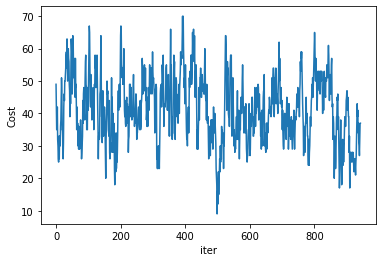

Best First Partition: 
	 G13 G2 G7 G12 G1 
Best Second Partition: 
	 G10 G6 G11 G14 G3 G16 G5 G0 G9 G8 G17 G15 
Cost:  9
Cut Size:  2
Balance Size for First Partition:  0.29411764705882354


In [51]:
graph.simulated_annealing_partition(init_temp = 20, r = 0.9, cost_lambda = 1)

In [52]:
graph.floorplan_simulated_annealing(GATE_SIZES, T0 = 270, Tf = 10, r = 0.85, k=10, lambda_cost = 0.5)

Slicing Tree Traversal:
G17 [2, 1] -> G5 [10, 10] -> V [12, 10] -> G10 [2, 3] -> V [14, 10] -> G6 [10, 10] -> V [24, 10] -> G11 [2, 3] -> V [26, 10] -> G7 [10, 10] -> V [36, 10] -> G13 [2, 3] -> V [38, 10] -> G14 [2, 1] -> V [40, 10] -> G8 [4, 3] -> V [44, 10] -> G15 [3, 4] -> V [47, 10] -> G12 [2, 3] -> V [49, 10] -> G16 [3, 4] -> V [52, 10] -> G9 [2, 2] -> V [54, 10] -> 
Initial Cost =  2071.75
Slicing Tree Expression: 
G17-G5-V-G10-V-G6-V-G11-V-G7-V-G13-V-G14-V-G8-V-G15-V-G12-V-G16-V-G9-V-



Simulated Annealing Process





Current Temperature =  270
Current Expression: 
G17-G5-V-G10-V-G6-V-G11-V-G7-V-G13-V-G14-V-G8-V-G15-V-G12-V-G16-V-G9-V-



Iteration:  1

M3 Move
M3 Not possible
Transfer Slicing Tree
G17 G5 V G10 V G6 V G11 V G7 V G13 V G14 V G8 V G15 V G12 V G16 V G9 V 
Delta Cost =  0.0
Uphill Move Accepted


Iteration:  2

M1 Move
Transfer Slicing Tree
G5 G17 V G10 V G6 V G11 V G7 V G13 V G14 V G8 V G15 V G12 V G16 V G9 V 
Delta Cost =  15.0
Move Accepted


Iteration:  3

M2

G5 G10 G17 H V G6 H G11 V G13 G7 V H G14 V G12 V G16 V G8 V G9 H G15 V 
Delta Cost =  -244.0
Move Rejected


Iteration:  112

M1 Move
Transfer Slicing Tree
G5 G10 G17 H V G11 H G6 V G13 G7 V H G14 V G12 V G16 V G8 V G9 V G15 V 
Delta Cost =  -230.0
Move Rejected


Iteration:  113

M3 Move
Transfer Slicing Tree
G5 G10 G17 H V G6 G11 H V G13 G7 V H G14 V G12 V G16 V G8 V G9 V G15 V 
Delta Cost =  -126.0
Move Rejected


Iteration:  114

M3 Move
Transfer Slicing Tree
G5 G10 H G17 V G6 H G11 V G13 G7 V H G14 V G12 V G16 V G8 V G9 V G15 V 
Delta Cost =  -217.5
Move Rejected


Iteration:  115

M1 Move
Transfer Slicing Tree
G5 G10 G17 H V G6 H G11 V G7 G13 V H G14 V G12 V G16 V G8 V G9 V G15 V 
Delta Cost =  -26.0
Move Rejected


Iteration:  116

M3 Move
Transfer Slicing Tree
G5 G10 G17 H V G6 G11 H V G13 G7 V H G14 V G12 V G16 V G8 V G9 V G15 V 
Delta Cost =  -126.0
Move Rejected


Iteration:  117

M1 Move
Transfer Slicing Tree
G5 G10 G17 H V G6 H G11 V G13 G14 V H G7 V G12 V G16 V G8 V G9 V 

Iteration:  76

M1 Move
Transfer Slicing Tree
G5 G10 G17 H V G6 H G11 V G7 G13 V H G14 V G8 V G16 G12 H V G9 V G15 V 
Delta Cost =  -26.0
Move Rejected


Iteration:  77

M2 Move
Transfer Slicing Tree
G5 G10 G17 H V G6 H G11 V G13 G7 V H G14 V G8 V G16 G12 V H G9 V G15 V 
Delta Cost =  -24.5
Move Rejected


Iteration:  78

M2 Move
Transfer Slicing Tree
G5 G10 G17 H V G6 H G11 V G13 G7 V H G14 V G8 V G16 G12 V H G9 V G15 V 
Delta Cost =  -24.5
Move Rejected


Iteration:  79

M1 Move
Transfer Slicing Tree
G5 G10 G6 H V G17 H G11 V G13 G7 V H G14 V G8 V G16 G12 H V G9 V G15 V 
Delta Cost =  -169.5
Move Rejected


Iteration:  80

M3 Move
Transfer Slicing Tree
G5 G10 G17 V H G6 H G11 V G13 G7 V H G14 V G8 V G16 G12 H V G9 V G15 V 
Delta Cost =  -132.5
Move Rejected


Iteration:  81

M2 Move
Transfer Slicing Tree
G5 G10 G17 H V G6 H G11 V G13 G7 V H G14 V G8 V G16 G12 H V G9 V G15 H 
Delta Cost =  -316.5
Move Rejected


Iteration:  82

M2 Move
Transfer Slicing Tree
G5 G10 G17 V H G6 H G11 V G

G5 G17 G10 H V G6 H G11 V G13 G7 V G14 H V G16 V G8 G12 H V G15 V G9 V 
Delta Cost =  -99.0
Move Rejected


Iteration:  7

M2 Move
Transfer Slicing Tree
G5 G17 G10 H V G6 H G11 V G13 G7 V H G14 V G16 V G8 G12 V H G15 V G9 V 
Delta Cost =  -256.5
Move Rejected


Iteration:  8

M2 Move
Transfer Slicing Tree
G5 G17 G10 H V G6 H G11 V G13 G7 V H G14 V G16 V G8 G12 V H G15 V G9 V 
Delta Cost =  -256.5
Move Rejected


Iteration:  9

M3 Move
Transfer Slicing Tree
G5 G17 G10 V H G6 H G11 V G13 G7 V H G14 V G16 V G8 G12 H V G15 V G9 V 
Delta Cost =  -120.5
Move Rejected


Iteration:  10

M2 Move
Transfer Slicing Tree
G5 G17 G10 V H G6 H G11 V G13 G7 V H G14 V G16 V G8 G12 H V G15 V G9 V 
Delta Cost =  -120.5
Move Rejected


Iteration:  11

M3 Move
Transfer Slicing Tree
G5 G17 G10 H V G6 H G11 V G13 V G7 H G14 V G16 V G8 G12 H V G15 V G9 V 
Delta Cost =  -115.0
Move Rejected


Iteration:  12

M2 Move
Transfer Slicing Tree
G5 G17 G10 H V G6 H G11 V G13 G7 V H G14 V G16 H G8 G12 H V G15 V G9 V 
De

G5 G10 G17 H V G6 H G11 V G13 G7 V G16 H V G14 V G8 G12 H V G9 V G15 V 
Delta Cost =  -73.5
Move Rejected


Iteration:  84

M1 Move
Transfer Slicing Tree
G5 G10 G17 H V G6 H G13 V G11 G7 V H G16 V G14 V G8 G12 H V G9 V G15 V 
Delta Cost =  -276.5
Move Rejected


Iteration:  85

M3 Move
Transfer Slicing Tree
G5 G10 G17 H V G6 H G11 V G13 G7 V G16 H V G14 V G8 G12 H V G9 V G15 V 
Delta Cost =  -73.5
Move Rejected


Iteration:  86

M3 Move
Transfer Slicing Tree
G5 G10 G17 H V G6 G11 H V G13 G7 V H G16 V G14 V G8 G12 H V G9 V G15 V 
Delta Cost =  -140.0
Move Rejected


Iteration:  87

M3 Move
Transfer Slicing Tree
G5 G10 G17 H V G6 H G11 V G13 G7 V H G16 V G14 V G8 H G12 V G9 V G15 V 
Delta Cost =  -379.0
Move Rejected


Iteration:  88

M2 Move
Transfer Slicing Tree
G5 G10 G17 H V G6 H G11 V G13 G7 V H G16 V G14 V G8 G12 H V G9 H G15 V 
Delta Cost =  -234.0
Move Rejected


Iteration:  89

M3 Move
Transfer Slicing Tree
G5 G10 G17 H V G6 H G11 V G13 G7 V G16 H V G14 V G8 G12 H V G9 V G15 V 


G5 G17 G10 H V G6 V G11 V G13 G7 V H G14 V G16 V G8 G12 H V G15 V G9 V 
Delta Cost =  -43.0
Move Rejected


Iteration:  15

M2 Move
Transfer Slicing Tree
G5 G17 G10 H V G6 H G11 V G13 G7 H V G14 V G16 V G8 G12 H V G15 V G9 V 
Delta Cost =  -88.0
Move Rejected


Iteration:  16

M1 Move
Transfer Slicing Tree
G17 G5 G10 H V G6 H G11 V G13 G7 V H G14 V G16 V G8 G12 H V G15 V G9 V 
Delta Cost =  -216.5
Move Rejected


Iteration:  17

M1 Move
Transfer Slicing Tree
G5 G17 G10 H V G6 H G11 V G13 G7 V H G14 V G16 V G8 G15 H V G12 V G9 V 
Delta Cost =  4.0
Move Accepted


Iteration:  18

M1 Move
Transfer Slicing Tree
G17 G5 G10 H V G6 H G11 V G13 G7 V H G14 V G16 V G8 G15 H V G12 V G9 V 
Delta Cost =  -213.5
Move Rejected


Iteration:  19

M3 Move
Transfer Slicing Tree
G5 G17 H G10 V G6 H G11 V G13 G7 V H G14 V G16 V G8 G15 H V G12 V G9 V 
Delta Cost =  -65.0
Move Rejected


Iteration:  20

M3 Move
Transfer Slicing Tree
G5 G17 G10 H V G6 H G11 V G13 G7 V G14 H V G16 V G8 G15 H V G12 V G9 V 
Delt

Transfer Slicing Tree
G5 G10 G17 H V G6 H G11 V G13 G7 V H G14 V G16 V G8 G15 H V G12 G9 H V 
Delta Cost =  7.0
Move Accepted


Iteration:  92

M3 Move
Transfer Slicing Tree
G5 G10 G17 H V G6 G11 H V G13 G7 V H G14 V G16 V G8 G15 H V G12 G9 H V 
Delta Cost =  -143.5
Move Rejected


Iteration:  93

M2 Move
Transfer Slicing Tree
G5 G10 G17 V H G6 H G11 V G13 G7 V H G14 V G16 V G8 G15 H V G12 G9 H V 
Delta Cost =  -123.5
Move Rejected


Iteration:  94

M2 Move
Transfer Slicing Tree
G5 G10 G17 H V G6 H G11 V G13 G7 V H G14 V G16 V G8 G15 H V G12 G9 V H 
Delta Cost =  -177.0
Move Rejected


Iteration:  95

M2 Move
Transfer Slicing Tree
G5 G10 G17 H V G6 H G11 V G13 G7 V H G14 V G16 V G8 G15 V H G12 G9 H V 
Delta Cost =  -198.5
Move Rejected


Iteration:  96

M1 Move
Transfer Slicing Tree
G5 G10 G17 H V G6 H G11 V G13 G7 V H G14 V G16 V G8 G12 H V G15 G9 H V 
Delta Cost =  -14.0
Move Rejected


Iteration:  97

M2 Move
Transfer Slicing Tree
G5 G10 G17 H V G6 H G11 H G13 G7 V H G14 V G16 V G8 

Transfer Slicing Tree
G5 G10 G17 H V G6 H G11 V G7 V G13 H G14 V G16 V G8 G15 H V G9 G12 H V 
Delta Cost =  -200.5
Move Rejected


Iteration:  38

M1 Move
Transfer Slicing Tree
G5 G10 G6 H V G17 H G11 V G7 G13 V H G14 V G16 V G8 G15 H V G9 G12 H V 
Delta Cost =  -187.5
Move Rejected


Iteration:  39

M1 Move
Transfer Slicing Tree
G5 G10 G17 H V G6 H G11 V G7 G13 V H G14 V G8 V G16 G15 H V G9 G12 H V 
Delta Cost =  -16.5
Move Rejected


Iteration:  40

M3 Move
Transfer Slicing Tree
G5 G10 G17 H V G6 H G11 V G7 G13 V G14 H V G16 V G8 G15 H V G9 G12 H V 
Delta Cost =  -128.0
Move Rejected


Iteration:  41

M1 Move
Transfer Slicing Tree
G5 G10 G17 H V G6 H G11 V G7 G13 V H G14 V G16 V G8 G15 H V G12 G9 H V 
Delta Cost =  -9.5
Uphill Move Accepted


Iteration:  42

M3 Move
Transfer Slicing Tree
G5 G10 G17 V H G6 H G11 V G7 G13 V H G14 V G16 V G8 G15 H V G12 G9 H V 
Delta Cost =  -123.5
Move Rejected


Iteration:  43

M3 Move
Transfer Slicing Tree
G5 G10 H G17 V G6 H G11 V G7 G13 V H G14 V G

G5 G17 G10 H V G6 H G11 V G7 G13 V H G8 V G15 V G14 G16 H V G12 G9 H V 
Delta Cost =  -55.5
Move Rejected


Iteration:  99

M3 Move
Transfer Slicing Tree
G5 G17 H G10 V G6 H G11 V G7 G13 V H G8 V G14 V G15 G16 H V G12 G9 H V 
Delta Cost =  -63.0
Move Rejected


Iteration:  100

M3 Move
Transfer Slicing Tree
G5 G17 G10 H V G6 H G11 V G7 G13 V H G8 V G14 V G15 H G16 V G12 G9 H V 
Delta Cost =  -409.5
Move Rejected


Iteration:  101

M1 Move
Transfer Slicing Tree
G5 G17 G10 H V G6 H G11 V G7 G13 V H G8 V G14 V G15 G12 H V G16 G9 H V 
Delta Cost =  -28.0
Move Rejected


Iteration:  102

M1 Move
Transfer Slicing Tree
G5 G17 G10 H V G11 H G6 V G7 G13 V H G8 V G14 V G15 G16 H V G12 G9 H V 
Delta Cost =  -247.5
Move Rejected


Iteration:  103

M3 Move
Transfer Slicing Tree
G5 G17 G10 V H G6 H G11 V G7 G13 V H G8 V G14 V G15 G16 H V G12 G9 H V 
Delta Cost =  -111.5
Move Rejected


Iteration:  104

M3 Move
Transfer Slicing Tree
G5 G17 G10 H V G6 H G11 V G7 G13 V H G8 V G14 V G15 G16 H V G12 G9 V

G5 G17 G10 H V G6 V G11 V G7 G13 V H G12 V G14 V G15 G8 H G16 H G9 H V 
Delta Cost =  -105.0
Move Rejected


Iteration:  45

M1 Move
Transfer Slicing Tree
G5 G17 G10 H V G6 H G7 V G11 G13 V H G12 V G14 V G15 G8 H G16 H G9 H V 
Delta Cost =  -335.5
Move Rejected


Iteration:  46

M3 Move
Transfer Slicing Tree
G5 G17 G10 H V G6 G11 H V G7 G13 V H G12 V G14 V G15 G8 H G16 H G9 H V 
Delta Cost =  -114.0
Move Rejected


Iteration:  47

M2 Move
Transfer Slicing Tree
G5 G17 G10 H V G6 H G11 V G7 G13 V H G12 V G14 V G15 G8 H G16 H G9 V H 
Delta Cost =  -210.5
Move Rejected


Iteration:  48

M1 Move
Transfer Slicing Tree
G5 G10 G17 H V G6 H G11 V G7 G13 V H G12 V G14 V G15 G8 H G16 H G9 H V 
Delta Cost =  2.0
Move Accepted


Iteration:  49

M3 Move
Transfer Slicing Tree
G5 G10 G17 H V G6 H G11 V G7 G13 V G12 H V G14 V G15 G8 H G16 H G9 H V 
Delta Cost =  -187.5
Move Rejected


Iteration:  50

M3 Move
Transfer Slicing Tree
G5 G10 G17 H V G6 H G11 V G7 G13 V G12 H V G14 V G15 G8 H G16 H G9 H V 
D

G10 G5 G17 H V G6 H G11 V G7 G12 V H G13 H G8 G14 H G15 H G9 H G16 H V 
Delta Cost =  -105.5
Move Rejected


Iteration:  122

M2 Move
Transfer Slicing Tree
G5 G10 G17 H V G6 H G11 V G7 G12 V H G13 H G8 G14 H G15 H G9 H G16 V H 
Delta Cost =  -738.0
Move Rejected


Iteration:  123

M3 Move
Transfer Slicing Tree
G5 G10 G17 H V G6 H G11 V G7 G12 V H G13 H G8 H G14 G15 H G9 H G16 H V 
Delta Cost =  -350.5
Move Rejected


Iteration:  124

M3 Move
Transfer Slicing Tree
G5 G10 G17 V H G6 H G11 V G7 G12 V H G13 H G8 G14 H G15 H G9 H G16 H V 
Delta Cost =  -90.0
Move Rejected


Iteration:  125

M3 Move
Transfer Slicing Tree
G5 G10 G17 H V G6 G11 H V G7 G12 V H G13 H G8 G14 H G15 H G9 H G16 H V 
Delta Cost =  -176.0
Move Rejected


Iteration:  126

M3 Move
Transfer Slicing Tree
G5 G10 H G17 V G6 H G11 V G7 G12 V H G13 H G8 G14 H G15 H G9 H G16 H V 
Delta Cost =  -171.0
Move Rejected


Iteration:  127

M3 Move
Transfer Slicing Tree
G5 G10 G17 H V G6 H G11 V G7 G12 V H G13 H G8 H G14 G15 H G9 H G1

G5 G17 G10 H V G6 H G11 V G7 G12 V H G13 H G8 H G14 G9 H G15 H G16 H V 
Delta Cost =  -335.5
Move Rejected


Iteration:  53

M2 Move
Transfer Slicing Tree
G5 G17 G10 H V G6 H G11 V G7 G12 V H G13 V G8 G14 H G9 H G15 H G16 H V 
Delta Cost =  -119.5
Move Rejected


Iteration:  54

M3 Move
Transfer Slicing Tree
G5 G17 G10 V H G6 H G11 V G7 G12 V H G13 H G8 G14 H G9 H G15 H G16 H V 
Delta Cost =  -81.0
Move Rejected


Iteration:  55

M2 Move
Transfer Slicing Tree
G5 G17 G10 H V G6 H G11 V G7 G12 V H G13 H G8 G14 V G9 H G15 H G16 H V 
Delta Cost =  -78.0
Move Rejected


Iteration:  56

M2 Move
Transfer Slicing Tree
G5 G17 G10 H V G6 H G11 V G7 G12 V H G13 H G8 G14 H G9 H G15 H G16 V H 
Delta Cost =  -730.0
Move Rejected


Iteration:  57

M2 Move
Transfer Slicing Tree
G5 G17 G10 H V G6 H G11 V G7 G12 V H G13 H G8 G14 H G9 V G15 H G16 H V 
Delta Cost =  -77.0
Move Rejected


Iteration:  58

M3 Move
Transfer Slicing Tree
G5 G17 G10 H V G6 G11 H V G7 G12 V H G13 H G8 G14 H G9 H G15 H G16 H V 
D

G5 G17 G10 H V G6 H G11 V G12 G7 H V G13 H G8 G9 H G16 H G14 H G15 H V 
Delta Cost =  -257.0
Move Rejected


Iteration:  14

M1 Move
Transfer Slicing Tree
G5 G17 G10 H V G6 H G11 V G12 G7 V H G13 H G8 G16 H G9 H G14 H G15 H V 
Delta Cost =  -2.0
Uphill Move Accepted


Iteration:  15

M1 Move
Transfer Slicing Tree
G5 G17 G10 H V G6 H G11 V G12 G7 V H G13 H G16 G8 H G9 H G14 H G15 H V 
Delta Cost =  31.5
Move Accepted


Iteration:  16

M2 Move
Transfer Slicing Tree
G5 G17 G10 H V G6 V G11 V G12 G7 V H G13 H G16 G8 H G9 H G14 H G15 H V 
Delta Cost =  -171.0
Move Rejected


Iteration:  17

M3 Move
Transfer Slicing Tree
G5 G17 G10 H V G6 H G11 V G12 G7 V H G13 G16 H G8 H G9 H G14 H G15 H V 
Delta Cost =  -72.5
Move Rejected


Iteration:  18

M2 Move
Transfer Slicing Tree
G5 G17 G10 H V G6 H G11 V G12 G7 H V G13 H G16 G8 H G9 H G14 H G15 H V 
Delta Cost =  -257.0
Move Rejected


Iteration:  19

M2 Move
Transfer Slicing Tree
G5 G17 G10 H V G6 H G11 V G12 G7 V H G13 H G16 G8 H G9 V G14 H G15 H

Iteration:  75

M1 Move
Transfer Slicing Tree
G5 G17 G10 H V G6 H G11 V G12 G13 V H G7 H G16 G9 H G14 H G8 H G15 H V 
Delta Cost =  -10.0
Uphill Move Accepted


Iteration:  76

M2 Move
Transfer Slicing Tree
G5 G17 G10 H V G6 H G11 H G12 G13 V H G7 H G16 G9 H G14 H G8 H G15 H V 
Delta Cost =  -194.0
Move Rejected


Iteration:  77

M3 Move
Transfer Slicing Tree
G5 G17 G10 V H G6 H G11 V G12 G13 V H G7 H G16 G9 H G14 H G8 H G15 H V 
Delta Cost =  -72.0
Move Rejected


Iteration:  78

M1 Move
Transfer Slicing Tree
G5 G17 G10 H V G6 H G11 V G12 G13 V H G7 H G16 G9 H G14 H G15 H G8 H V 
Delta Cost =  -7.0
Uphill Move Accepted


Iteration:  79

M3 Move
Transfer Slicing Tree
G5 G17 G10 H V G6 H G11 V G12 G13 V H G7 G16 H G9 H G14 H G15 H G8 H V 
Delta Cost =  -59.0
Move Rejected


Iteration:  80

M3 Move
Transfer Slicing Tree
G5 G17 G10 V H G6 H G11 V G12 G13 V H G7 H G16 G9 H G14 H G15 H G8 H V 
Delta Cost =  -72.0
Move Rejected


Iteration:  81

M3 Move
Transfer Slicing Tree
G5 G17 G10 H V G

G5 G10 G17 H V G6 H G11 V G12 G13 V H G7 H G14 G16 H G8 H G9 H G15 V H 
Delta Cost =  -751.0
Move Rejected


Iteration:  37

M1 Move
Transfer Slicing Tree
G5 G10 G17 H V G6 H G11 V G12 G13 V H G7 H G16 G14 H G8 H G9 H G15 H V 
Delta Cost =  3.5
Move Accepted


Iteration:  38

M1 Move
Transfer Slicing Tree
G5 G10 G17 H V G6 H G11 V G12 G13 V H G7 H G16 G14 H G9 H G8 H G15 H V 
Delta Cost =  13.0
Move Accepted


Iteration:  39

M1 Move
Transfer Slicing Tree
G5 G10 G17 H V G6 H G11 V G12 G13 V H G7 H G16 G14 H G8 H G9 H G15 H V 
Delta Cost =  -13.0
Uphill Move Accepted


Iteration:  40

M3 Move
Transfer Slicing Tree
G5 G10 G17 H V G6 H G11 V G12 G13 V H G7 G16 H G14 H G8 H G9 H G15 H V 
Delta Cost =  -36.0
Move Rejected


Iteration:  41

M3 Move
Transfer Slicing Tree
G5 G10 G17 H V G6 G11 H V G12 G13 V H G7 H G16 G14 H G8 H G9 H G15 H V 
Delta Cost =  -182.0
Move Rejected


Iteration:  42

M2 Move
Transfer Slicing Tree
G5 G10 G17 H V G6 H G11 V G12 G13 H V G7 H G16 G14 H G8 H G9 H G15 H V



Iteration:  37

M3 Move
Transfer Slicing Tree
G5 G17 G10 H V G6 H G11 V G13 V G12 H G14 G7 H G15 H G8 H G9 H G16 H V 
Delta Cost =  -197.5
Move Rejected


Iteration:  38

M2 Move
Transfer Slicing Tree
G5 G17 G10 H V G6 H G11 V G13 G12 V H G14 G7 H G15 H G8 H G9 H G16 V H 
Delta Cost =  -798.0
Move Rejected


Iteration:  39

M2 Move
Transfer Slicing Tree
G5 G17 G10 H V G6 H G11 V G13 G12 V H G14 G7 H G15 H G8 H G9 V G16 H V 
Delta Cost =  -62.0
Move Rejected


Iteration:  40

M1 Move
Transfer Slicing Tree
G5 G17 G10 H V G6 H G11 V G13 G12 V H G7 G14 H G15 H G8 H G9 H G16 H V 
Delta Cost =  15.0
Move Accepted


Iteration:  41

M2 Move
Transfer Slicing Tree
G5 G17 G10 H V G6 V G11 V G13 G12 V H G7 G14 H G15 H G8 H G9 H G16 H V 
Delta Cost =  -401.0
Move Rejected


Iteration:  42

M2 Move
Transfer Slicing Tree
G5 G17 G10 H V G6 H G11 V G13 G12 V H G7 G14 V G15 H G8 H G9 H G16 H V 
Delta Cost =  -92.0
Move Rejected


Iteration:  43

M3 Move
Transfer Slicing Tree
G5 G17 G10 H V G6 H G11 V 

G17 G5 H G10 V G6 G11 H V G13 G12 V H G14 G7 H G8 H G9 H G15 H G16 H V 
Delta Cost =  -307.0
Move Rejected


Iteration:  106

M2 Move
Transfer Slicing Tree
G17 G5 H G10 V G6 H G11 V G13 G12 V H G14 G7 H G8 H G9 H G15 V G16 H V 
Delta Cost =  -188.5
Move Rejected


Iteration:  107

M2 Move
Transfer Slicing Tree
G17 G5 V G10 V G6 H G11 V G13 G12 V H G14 G7 H G8 H G9 H G15 H G16 H V 
Delta Cost =  -70.0
Move Rejected


Iteration:  108

M2 Move
Transfer Slicing Tree
G17 G5 H G10 V G6 H G11 V G13 G12 V H G14 G7 V G8 H G9 H G15 H G16 H V 
Delta Cost =  -49.0
Move Rejected


Iteration:  109

M2 Move
Transfer Slicing Tree
G17 G5 H G10 V G6 H G11 H G13 G12 V H G14 G7 H G8 H G9 H G15 H G16 H V 
Delta Cost =  -136.0
Move Rejected


Iteration:  110

M1 Move
Transfer Slicing Tree
G17 G5 H G10 V G6 H G13 V G11 G12 V H G14 G7 H G8 H G9 H G15 H G16 H V 
Delta Cost =  -245.0
Move Rejected


Iteration:  111

M2 Move
Transfer Slicing Tree
G17 G5 H G10 V G6 H G11 V G13 G12 V H G14 G7 H G8 H G9 H G15 H G16

G5 G17 H G10 V G6 H G11 V G13 G12 V H G14 H G7 G15 H G8 H G9 H G16 H V 
Delta Cost =  -47.0
Move Rejected


Iteration:  67

M3 Move
Transfer Slicing Tree
G5 G17 H G10 V G6 H G11 V G13 G12 V G14 H G7 H G15 H G8 H G9 H G16 H V 
Delta Cost =  -131.0
Move Rejected


Iteration:  68

M2 Move
Transfer Slicing Tree
G5 G17 H G10 V G6 H G11 V G13 G12 V H G14 G7 V G15 H G8 H G9 H G16 H V 
Delta Cost =  -47.0
Move Rejected


Iteration:  69

M1 Move
Transfer Slicing Tree
G5 G17 H G10 V G6 H G11 V G13 G14 V H G12 G7 H G15 H G8 H G9 H G16 H V 
Delta Cost =  -113.0
Move Rejected


Iteration:  70

M3 Move
Transfer Slicing Tree
G5 G17 H G10 V G6 H G11 V G13 G12 V H G14 G7 H G15 H G8 H G9 H G16 V H 
Delta Cost =  -834.0
Move Rejected


Iteration:  71

M1 Move
Transfer Slicing Tree
G17 G5 H G10 V G6 H G11 V G13 G12 V H G14 G7 H G15 H G8 H G9 H G16 H V 
Delta Cost =  13.5
Move Accepted


Iteration:  72

M1 Move
Transfer Slicing Tree
G17 G5 H G10 V G6 H G11 V G13 G12 V H G14 G7 H G15 H G8 H G16 H G9 H V 
De

G5 G10 G17 H V G6 H G11 V G13 G8 V H G7 G12 G14 H V G16 H G15 H G9 H V 
Delta Cost =  -182.5
Move Rejected


Iteration:  129

M2 Move
Transfer Slicing Tree
G5 G10 G17 H V G6 H G11 V G13 G8 V H G7 G12 G14 V H V G16 G15 H G9 H V 
Delta Cost =  -269.5
Move Rejected


Iteration:  130

M1 Move
Transfer Slicing Tree
G5 G10 G17 H V G6 H G11 V G13 G8 V H G7 G14 G12 H V H G16 G15 H G9 H V 
Delta Cost =  9.5
Move Accepted




Current Temperature =  45.18267579619584
Current Expression: 
G5-G10-G17-H-V-G6-H-G11-V-G13-G8-V-H-G7-G14-G12-H-V-H-G16-G15-H-G9-H-V-



Iteration:  1

M2 Move
Transfer Slicing Tree
G5 G10 G17 H V G6 H G11 V G13 G8 V H G7 G14 G12 H V H G16 G15 H G9 V H 
Delta Cost =  -574.0
Move Rejected


Iteration:  2

M1 Move
Transfer Slicing Tree
G5 G10 G17 H V G6 H G11 V G13 G8 V H G7 G14 G12 H V H G16 G9 H G15 H V 
Delta Cost =  31.0
Move Accepted


Iteration:  3

M1 Move
Transfer Slicing Tree
G5 G10 G17 H V G6 H G11 V G13 G7 V H G8 G14 G12 H V H G16 G9 H G15 H V 
Delta Cost =  -123.0

G5 G10 G6 H V G17 G11 H V G13 G8 V G16 H G7 V G12 V H G14 G15 V G9 H V 
Delta Cost =  -65.5
Move Rejected


Iteration:  90

M1 Move
Transfer Slicing Tree
G5 G10 G6 H V G17 G11 H V G13 G8 V G7 H G16 V G12 V H G14 G15 H G9 H V 
Delta Cost =  -101.5
Move Rejected


Iteration:  91

M2 Move
Transfer Slicing Tree
G5 G10 G6 H V G17 G11 H V G13 G8 V G16 H G7 V G12 V H G14 G15 V G9 H V 
Delta Cost =  -65.5
Move Rejected


Iteration:  92

M2 Move
Transfer Slicing Tree
G5 G10 G6 H V G17 G11 H V G13 G8 V G16 H G7 V G12 V H G14 G15 V G9 H V 
Delta Cost =  -65.5
Move Rejected


Iteration:  93

M2 Move
Transfer Slicing Tree
G5 G10 G6 H V G17 G11 H V G13 G8 V G16 V G7 V G12 V H G14 G15 H G9 H V 
Delta Cost =  -15.5
Uphill Move Accepted


Iteration:  94

M3 Move
Transfer Slicing Tree
G5 G10 G6 H V G17 G11 H V G13 G8 V G16 V G7 V G12 V H G14 H G15 G9 H V 
Delta Cost =  50.5
Move Accepted


Iteration:  95

M3 Move
Transfer Slicing Tree
G5 G10 H G6 V G17 G11 H V G13 G8 V G16 V G7 V G12 V H G14 H G15 G9 H 

G5 G10 H G6 V G17 G11 V H G8 G16 V G13 V G7 H G14 V H G15 G12 H G9 H V 
Delta Cost =  -109.0
Move Rejected


Iteration:  21

M3 Move
Transfer Slicing Tree
G5 G10 H G6 V G17 G11 V H G8 G16 V G13 V G7 H G14 V H G15 G12 H V G9 H 
Delta Cost =  -208.0
Move Rejected


Iteration:  22

M2 Move
Transfer Slicing Tree
G5 G10 V G6 V G17 G11 V H G8 G16 V G13 V G7 H G14 V H G15 G12 H G9 V H 
Delta Cost =  -48.5
Uphill Move Accepted


Iteration:  23

M3 Move
Transfer Slicing Tree
G5 G10 V G6 V G17 G11 V G8 H G16 V G13 V G7 H G14 V H G15 G12 H G9 V H 
Delta Cost =  15.0
Move Accepted


Iteration:  24

M3 Move
Transfer Slicing Tree
G5 G10 V G6 V G17 G11 V G8 H V G16 G13 V G7 H G14 V H G15 G12 H G9 V H 
Delta Cost =  -278.0
Move Rejected


Iteration:  25

M2 Move
Transfer Slicing Tree
G5 G10 V G6 V G17 G11 V G8 H G16 V G13 V G7 H G14 H V G15 G12 H G9 V H 
Delta Cost =  -522.5
Move Rejected


Iteration:  26

M2 Move
Transfer Slicing Tree
G5 G10 V G6 V G17 G11 V G8 H G16 H G13 V G7 H G14 V H G15 G12 H G9

G5 G10 V G17 V G6 G11 G8 V G16 H V G7 V G14 H G13 V G9 G15 V H G12 V H 
Delta Cost =  -349.5
Move Rejected


Iteration:  113

M1 Move
Transfer Slicing Tree
G5 G10 V G6 V G17 G11 G8 V G16 H V G7 V G13 H G14 V G9 G15 V H G12 V H 
Delta Cost =  -71.5
Move Rejected


Iteration:  114

M1 Move
Transfer Slicing Tree
G5 G10 V G17 V G6 G11 G8 V G16 H V G7 V G14 H G13 V G9 G15 V H G12 V H 
Delta Cost =  -349.5
Move Rejected


Iteration:  115

M1 Move
Transfer Slicing Tree
G5 G10 V G6 V G17 G11 G16 V G8 H V G7 V G14 H G13 V G9 G15 V H G12 V H 
Delta Cost =  21.5
Move Accepted


Iteration:  116

M1 Move
Transfer Slicing Tree
G5 G6 V G10 V G17 G11 G16 V G8 H V G7 V G14 H G13 V G9 G15 V H G12 V H 
Delta Cost =  -63.0
Move Rejected


Iteration:  117

M3 Move
Transfer Slicing Tree
G5 G10 V G6 V G17 G11 G16 V G8 H V G7 V G14 H G13 V G9 G15 V G12 H V H 
Delta Cost =  -21.5
Uphill Move Accepted


Iteration:  118

M3 Move
Transfer Slicing Tree
G5 G10 V G6 V G17 G11 G16 V G8 H V G7 V H G14 G13 V G9 G15 V G

G5 G10 V G6 V G17 G8 V G11 H G16 H G7 V H G14 G15 V H G13 G12 H G9 V H 
Delta Cost =  -9.5
Uphill Move Accepted


Iteration:  44

M2 Move
Transfer Slicing Tree
G5 G10 V G6 V G17 G8 V G11 H G16 V G7 V H G14 G15 V H G13 G12 H G9 V H 
Delta Cost =  -33.5
Uphill Move Accepted


Iteration:  45

M1 Move
Transfer Slicing Tree
G5 G10 V G6 V G17 G8 V G11 H G16 V G7 V H G14 G15 V H G13 G9 H G12 V H 
Delta Cost =  9.5
Move Accepted


Iteration:  46

M3 Move
Transfer Slicing Tree
G5 G10 V G6 V G17 G8 V G11 H G16 V G7 V H G14 V G15 H G13 G9 H G12 V H 
Delta Cost =  -141.0
Move Rejected


Iteration:  47

M2 Move
Transfer Slicing Tree
G5 G10 V G6 V G17 G8 V G11 H G16 V G7 V H G14 G15 V H G13 G9 H G12 H V 
Delta Cost =  -208.5
Move Rejected


Iteration:  48

M3 Move
Transfer Slicing Tree
G5 G10 V G6 V G17 G8 V G11 H G16 V G7 V H G14 G15 V H G13 H G9 G12 V H 
Delta Cost =  -32.5
Move Rejected


Iteration:  49

M1 Move
Transfer Slicing Tree
G5 G10 V G6 V G17 G8 V G11 H G16 V G14 V H G7 G15 V H G13 G9 H 

G10 G6 H G5 V G17 V G14 G16 H G8 V G7 V H G11 V G9 G15 V G13 G12 H V H 
Delta Cost =  8.0
Move Accepted


Iteration:  5

M1 Move
Transfer Slicing Tree
G10 G6 H G5 V G17 V G14 G16 H G8 V G7 V H G11 V G9 G13 V G15 G12 H V H 
Delta Cost =  -17.0
Uphill Move Accepted


Iteration:  6

M3 Move
Transfer Slicing Tree
G10 G6 H G5 V G17 V G14 G16 H V G8 G7 V H G11 V G9 G13 V G15 G12 H V H 
Delta Cost =  -498.0
Move Rejected


Iteration:  7

M3 Move
Transfer Slicing Tree
G10 G6 H G5 V G17 V G14 G16 G8 H V G7 V H G11 V G9 G13 V G15 G12 H V H 
Delta Cost =  -14.5
Uphill Move Accepted


Iteration:  8

M3 Move
Transfer Slicing Tree
G10 G6 H G5 V G17 V G14 G16 G8 H V G7 V G11 H V G9 G13 V G15 G12 H V H 
Delta Cost =  -391.5
Move Rejected


Iteration:  9

M1 Move
Transfer Slicing Tree
G10 G6 H G5 V G17 V G14 G16 G8 H V G7 V H G11 V G13 G9 V G15 G12 H V H 
Delta Cost =  18.0
Move Accepted


Iteration:  10

M3 Move
Transfer Slicing Tree
G10 G6 H G5 V G17 V G14 G16 G8 V H G7 V H G11 V G13 G9 V G15 G12 H V

G6 G10 G14 H V G5 V G17 G16 G11 V H G7 V H G8 V G13 G9 H G12 V H G15 H 
Delta Cost =  -219.5
Move Rejected


Iteration:  67

M2 Move
Transfer Slicing Tree
G6 G10 G14 H V G5 V G17 G16 G11 V H G8 V H G7 H G13 G9 H G12 V H G15 H 
Delta Cost =  -43.0
Uphill Move Accepted


Iteration:  68

M2 Move
Transfer Slicing Tree
G6 G10 G14 H V G5 V G17 G16 G11 V H G8 H V G7 H G13 G9 H G12 V H G15 H 
Delta Cost =  -381.5
Move Rejected


Iteration:  69

M3 Move
Transfer Slicing Tree
G6 G10 G14 H V G5 V G17 G16 G11 V H G8 V H G7 H G13 G9 G12 H V H G15 H 
Delta Cost =  9.5
Move Accepted


Iteration:  70

M3 Move
Transfer Slicing Tree
G6 G10 G14 H V G5 V G17 G16 G11 V H G8 V H G7 H G13 G9 H G12 V H G15 H 
Delta Cost =  -9.5
Uphill Move Accepted


Iteration:  71

M3 Move
Transfer Slicing Tree
G6 G10 G14 H V G5 V G17 G16 G11 V H G8 V H G7 H G13 G9 H V G12 H G15 H 
Delta Cost =  -348.0
Move Rejected


Iteration:  72

M3 Move
Transfer Slicing Tree
G6 G10 G14 H V G5 V G17 G16 G11 V H G8 V H G7 H G13 G9 G12 H V

G6 G10 G14 H V G5 V G11 G8 G13 V H G17 V G15 H G16 G9 H G12 H V H G7 V 
Delta Cost =  -27.0
Uphill Move Accepted


Iteration:  28

M1 Move
Transfer Slicing Tree
G6 G10 G14 H V G5 V G8 G11 G13 V H G17 V G15 H G16 G9 H G12 H V H G7 V 
Delta Cost =  27.0
Move Accepted


Iteration:  29

M3 Move
Transfer Slicing Tree
G6 G10 G14 H V G5 V G8 G11 G13 V G17 H V G15 H G16 G9 H G12 H V H G7 V 
Delta Cost =  62.5
Move Accepted


Iteration:  30

M3 Move
Transfer Slicing Tree
G6 G10 G14 V H G5 V G8 G11 G13 V G17 H V G15 H G16 G9 H G12 H V H G7 V 
Delta Cost =  4.5
Move Accepted


Iteration:  31

M2 Move
Transfer Slicing Tree
G6 G10 G14 H V G5 V G8 G11 G13 V G17 H V G15 H G16 G9 H G12 H V H G7 V 
Delta Cost =  -4.5
Uphill Move Accepted


Iteration:  32

M1 Move
Transfer Slicing Tree
G6 G10 G14 H V G5 V G11 G8 G13 V G17 H V G15 H G16 G9 H G12 H V H G7 V 
Delta Cost =  -40.0
Uphill Move Accepted


Iteration:  33

M3 Move
Transfer Slicing Tree
G6 G10 G14 H V G5 V G11 G8 G13 V G17 H V G15 H G16 G9 H G12 

G6 G10 V G5 G14 H V G8 V G11 G13 G15 V H G17 V G16 V G9 G7 H V H G12 H 
Delta Cost =  -217.5
Uphill Move Accepted


Iteration:  90

M1 Move
Transfer Slicing Tree
G6 G10 V G5 G14 H V G8 V G11 G13 G17 V H G15 V G16 V G9 G7 H V H G12 H 
Delta Cost =  31.5
Move Accepted


Iteration:  91

M2 Move
Transfer Slicing Tree
G6 G10 V G5 G14 H V G8 V G11 G13 G17 V H G15 V G16 V G9 G7 H V H G12 V 
Delta Cost =  -65.0
Move Rejected


Iteration:  92

M1 Move
Transfer Slicing Tree
G6 G10 V G5 G14 H V G8 V G11 G13 G17 V H G15 V G16 V G9 G12 H V H G7 H 
Delta Cost =  -19.5
Uphill Move Accepted


Iteration:  93

M1 Move
Transfer Slicing Tree
G6 G10 V G5 G14 H V G11 V G8 G13 G17 V H G15 V G16 V G9 G12 H V H G7 H 
Delta Cost =  188.5
Move Accepted


Iteration:  94

M1 Move
Transfer Slicing Tree
G6 G10 V G5 G14 H V G8 V G11 G13 G17 V H G15 V G16 V G9 G12 H V H G7 H 
Delta Cost =  -188.5
Move Rejected


Iteration:  95

M2 Move
Transfer Slicing Tree
G6 G10 V G5 G14 H V G11 V G8 G13 G17 V H G15 H G16 V G9 G12 H

G6 G10 V G13 G5 H G11 H G15 G14 H V H G16 G8 V G9 V G17 V H G12 H G7 V 
Delta Cost =  -25.5
Uphill Move Accepted


Iteration:  36

M1 Move
Transfer Slicing Tree
G6 G10 V G13 G5 H G11 H G15 G16 H V H G14 G8 V G9 V G17 V H G12 H G7 V 
Delta Cost =  -34.0
Uphill Move Accepted


Iteration:  37

M3 Move
Transfer Slicing Tree
G6 G10 V G13 G5 H G11 G15 H G16 H V H G14 G8 V G9 V G17 V H G12 H G7 V 
Delta Cost =  223.5
Move Accepted


Iteration:  38

M1 Move
Transfer Slicing Tree
G10 G6 V G13 G5 H G11 G15 H G16 H V H G14 G8 V G9 V G17 V H G12 H G7 V 
Delta Cost =  -23.0
Uphill Move Accepted


Iteration:  39

M1 Move
Transfer Slicing Tree
G10 G6 V G13 G5 H G11 G16 H G15 H V H G14 G8 V G9 V G17 V H G12 H G7 V 
Delta Cost =  16.0
Move Accepted


Iteration:  40

M2 Move
Transfer Slicing Tree
G10 G6 V G13 G5 V G11 G16 H G15 H V H G14 G8 V G9 V G17 V H G12 H G7 V 
Delta Cost =  -14.5
Uphill Move Accepted


Iteration:  41

M3 Move
Transfer Slicing Tree
G10 G6 V G13 G5 V G11 H G16 G15 H V H G14 G8 V G9

G6 G13 V G10 V G11 H G16 G9 G5 H V H G15 V G14 G7 H V G17 H G12 G8 H V 
Delta Cost =  -4.0
Uphill Move Accepted


Iteration:  97

M3 Move
Transfer Slicing Tree
G6 G13 V G10 V G11 H G16 G9 G5 H V G15 H V G14 G7 H V G17 H G12 G8 H V 
Delta Cost =  -860.0
Move Rejected


Iteration:  98

M2 Move
Transfer Slicing Tree
G6 G13 V G10 V G11 H G16 G9 G5 H V H G15 V G14 G7 H V G17 V G12 G8 H V 
Delta Cost =  -98.0
Uphill Move Accepted


Iteration:  99

M1 Move
Transfer Slicing Tree
G6 G10 V G13 V G11 H G16 G9 G5 H V H G15 V G14 G7 H V G17 V G12 G8 H V 
Delta Cost =  4.0
Move Accepted


Iteration:  100

M1 Move
Transfer Slicing Tree
G6 G10 V G11 V G13 H G16 G9 G5 H V H G15 V G14 G7 H V G17 V G12 G8 H V 
Delta Cost =  54.0
Move Accepted


Iteration:  101

M1 Move
Transfer Slicing Tree
G10 G6 V G11 V G13 H G16 G9 G5 H V H G15 V G14 G7 H V G17 V G12 G8 H V 
Delta Cost =  -54.0
Uphill Move Accepted


Iteration:  102

M2 Move
Transfer Slicing Tree
G10 G6 V G11 H G13 H G16 G9 G5 H V H G15 V G14 G7 H V G

In [53]:
graph.placement_simulated_annealing(GATE_SIZES, target_density = 0.7, aspect_ratio = 1, routing_per_cell=4, 
                                        T0 = 273, Tf = 10, k=10, r=0.95, lambda_overlap_cost = 100000)

IO Pads
G0 G1 G2 G3 G17_OUTPUT 
Gates
G17 G5 G10 G6 G11 G7 G13 G14 G8 G15 G12 G16 G9 Target Area:  525 Width:  22 Height:  22
Initial placement:
Initial Core Area:  22 X 22
Area Occupied:  368.0
Overlap Area:  30.0
Cost:  3001202.0
Placement Density =  0.7603305785123967
No of Gates: 13



Simulated Annealing Process: 


Current Temperature:  273


Iteration:  1  for current temperature
M1 Move: Displace
Best Placement Cost: 3001202.0
Transfer Cost: 2301572.0
Delta Cost 699630.0
Move Accepted


Iteration:  2  for current temperature
M1 Move: Displace
Best Placement Cost: 2301572.0
Transfer Cost: 2301932.0
Delta Cost -360.0
Uphill Move Accepted


Iteration:  3  for current temperature
M1 Move: Displace
Best Placement Cost: 2301572.0
Transfer Cost: 7701812.0
Delta Cost -5399880.0
Move Rejected



Move3
Best Placement Cost: 2301572.0
Transfer Cost: 2301932.0
Delta Cost 0.0
Uphill Move Accepted


Iteration:  4  for current temperature
M1 Move: Displace
Best Placement Cost: 2301572.0
Transf

Best Placement Cost: 702395.0
Transfer Cost: 1002324.0
Delta Cost -299929.0


Iteration:  70  for current temperature
M1 Move: Displace
Best Placement Cost: 702395.0
Transfer Cost: 1602378.0
Delta Cost -899983.0
Move Rejected


Iteration:  71  for current temperature
M1 Move: Displace
Best Placement Cost: 702395.0
Transfer Cost: 1002626.0
Delta Cost -300231.0
Move Rejected



Move3
Best Placement Cost: 702395.0
Transfer Cost: 1002376.0
Delta Cost -299981.0
Move Rejected


Iteration:  72  for current temperature
M1 Move: Displace
Best Placement Cost: 702395.0
Transfer Cost: 1602666.0
Delta Cost -900271.0
Move Rejected


Iteration:  73  for current temperature
M2 Move: Interchange
Move Rejected
Best Placement Cost: 702395.0
Transfer Cost: 6802487.0
Delta Cost -6100092.0


Iteration:  74  for current temperature
M2 Move: Interchange
Move Rejected
Best Placement Cost: 702395.0
Transfer Cost: 1002376.0
Delta Cost -299981.0


Iteration:  75  for current temperature
M1 Move: Displace
Best Pla

Transfer Cost: 802383.0
Delta Cost -99988.0
Move Rejected


Iteration:  24  for current temperature
M1 Move: Displace
Best Placement Cost: 702395.0
Transfer Cost: 8002219.0
Delta Cost -7299824.0
Move Rejected


Iteration:  25  for current temperature
M1 Move: Displace
Best Placement Cost: 702395.0
Transfer Cost: 1002302.0
Delta Cost -299907.0
Move Rejected


Iteration:  26  for current temperature
M1 Move: Displace
Best Placement Cost: 702395.0
Transfer Cost: 1602277.0
Delta Cost -899882.0
Move Rejected



Move3
Best Placement Cost: 702395.0
Transfer Cost: 1002307.0
Delta Cost -299912.0
Move Rejected


Iteration:  27  for current temperature
M1 Move: Displace
Best Placement Cost: 702395.0
Transfer Cost: 1602223.0
Delta Cost -899828.0
Move Rejected


Iteration:  28  for current temperature
M1 Move: Displace
Best Placement Cost: 702395.0
Transfer Cost: 3402357.0
Delta Cost -2699962.0
Move Rejected


Iteration:  29  for current temperature
M1 Move: Displace
Best Placement Cost: 702395.0
T

Move Rejected
Best Placement Cost: 201916.0
Transfer Cost: 6202083.0
Delta Cost -6000160.0


Iteration:  94  for current temperature
M2 Move: Interchange
Move Rejected
Best Placement Cost: 201916.0
Transfer Cost: 2201839.0
Delta Cost -1999916.0


Iteration:  95  for current temperature
M1 Move: Displace
Best Placement Cost: 201916.0
Transfer Cost: 501962.0
Delta Cost -300039.0
Move Rejected


Iteration:  96  for current temperature
M1 Move: Displace
Best Placement Cost: 201916.0
Transfer Cost: 601811.0
Delta Cost -399888.0
Move Rejected


Iteration:  97  for current temperature
M1 Move: Displace
Best Placement Cost: 201916.0
Transfer Cost: 8101919.0
Delta Cost -7899996.0
Move Rejected


Iteration:  98  for current temperature
M1 Move: Displace
Best Placement Cost: 201916.0
Transfer Cost: 602043.0
Delta Cost -400120.0
Move Rejected


Iteration:  99  for current temperature
M1 Move: Displace
Best Placement Cost: 201916.0
Transfer Cost: 601969.0
Delta Cost -400046.0
Move Rejected


Iterat

Delta Cost 0.0


Iteration:  68  for current temperature
M1 Move: Displace
Best Placement Cost: 201916.0
Transfer Cost: 2902355.0
Delta Cost -2700070.0
Move Rejected


Iteration:  69  for current temperature
M1 Move: Displace
Best Placement Cost: 201916.0
Transfer Cost: 7102213.0
Delta Cost -6899928.0
Move Rejected


Iteration:  70  for current temperature
M1 Move: Displace
Best Placement Cost: 201916.0
Transfer Cost: 602177.0
Delta Cost -399892.0
Move Rejected


Iteration:  71  for current temperature
M2 Move: Interchange
Move Accepted
Best Placement Cost: 201916.0
Transfer Cost: 202265.0
Delta Cost 20.0


Iteration:  72  for current temperature
M1 Move: Displace
Best Placement Cost: 201916.0
Transfer Cost: 402313.0
Delta Cost -200048.0
Move Rejected


Iteration:  73  for current temperature
M1 Move: Displace
Best Placement Cost: 201916.0
Transfer Cost: 1402429.0
Delta Cost -1200164.0
Move Rejected


Iteration:  74  for current temperature
M2 Move: Interchange
Uphill Move Accepted
Bes

Best Placement Cost: 201916.0
Transfer Cost: 2171.0
Delta Cost 199936.0
Move Accepted


Iteration:  25  for current temperature
M1 Move: Displace
Best Placement Cost: 2171.0
Transfer Cost: 1002155.0
Delta Cost -999984.0
Move Rejected


Iteration:  26  for current temperature
M1 Move: Displace
Best Placement Cost: 2171.0
Transfer Cost: 401995.0
Delta Cost -399824.0
Move Rejected


Iteration:  27  for current temperature
M1 Move: Displace
Best Placement Cost: 2171.0
Transfer Cost: 302191.0
Delta Cost -300020.0
Move Rejected


Iteration:  28  for current temperature
M2 Move: Interchange
Move Rejected
Best Placement Cost: 2171.0
Transfer Cost: 601909.0
Delta Cost -599738.0


Iteration:  29  for current temperature
M1 Move: Displace
Best Placement Cost: 2171.0
Transfer Cost: 201887.0
Delta Cost -199716.0
Move Rejected


Iteration:  30  for current temperature
M1 Move: Displace
Best Placement Cost: 2171.0
Transfer Cost: 8002155.0
Delta Cost -7999984.0
Move Rejected


Iteration:  31  for curr

Move Rejected
Best Placement Cost: 2171.0
Transfer Cost: 302554.0
Delta Cost -299980.0


Iteration:  25  for current temperature
M2 Move: Interchange
Move Accepted
Best Placement Cost: 2171.0
Transfer Cost: 2314.0
Delta Cost 260.0


Iteration:  26  for current temperature
M2 Move: Interchange
Uphill Move Accepted
Best Placement Cost: 2171.0
Transfer Cost: 2521.0
Delta Cost -207.0


Iteration:  27  for current temperature
M1 Move: Displace
Best Placement Cost: 2171.0
Transfer Cost: 602571.0
Delta Cost -600050.0
Move Rejected


Iteration:  28  for current temperature
M1 Move: Displace
Best Placement Cost: 2171.0
Transfer Cost: 1202239.0
Delta Cost -1199718.0
Move Rejected



Move3
Best Placement Cost: 2171.0
Transfer Cost: 2521.0
Delta Cost 0.0
Uphill Move Accepted


Iteration:  29  for current temperature
M2 Move: Interchange
Move Rejected
Best Placement Cost: 2171.0
Transfer Cost: 902125.0
Delta Cost -899604.0


Iteration:  30  for current temperature
M1 Move: Displace
Best Placement C

Delta Cost -400035.0
Move Rejected


Iteration:  96  for current temperature
M1 Move: Displace
Best Placement Cost: 2171.0
Transfer Cost: 802424.0
Delta Cost -799851.0
Move Rejected


Iteration:  97  for current temperature
M1 Move: Displace
Best Placement Cost: 2171.0
Transfer Cost: 1202594.0
Delta Cost -1200021.0
Move Rejected


Iteration:  98  for current temperature
M1 Move: Displace
Best Placement Cost: 2171.0
Transfer Cost: 602406.0
Delta Cost -599833.0
Move Rejected


Iteration:  99  for current temperature
M1 Move: Displace
Best Placement Cost: 2171.0
Transfer Cost: 602544.0
Delta Cost -599971.0
Move Rejected


Iteration:  100  for current temperature
M1 Move: Displace
Best Placement Cost: 2171.0
Transfer Cost: 702348.0
Delta Cost -699775.0
Move Rejected


Iteration:  101  for current temperature
M1 Move: Displace
Best Placement Cost: 2171.0
Transfer Cost: 8002520.0
Delta Cost -7999947.0
Move Rejected


Iteration:  102  for current temperature
M1 Move: Displace
Best Placement C

Delta Cost -600076.0
Move Rejected


Iteration:  24  for current temperature
M1 Move: Displace
Best Placement Cost: 2171.0
Transfer Cost: 402680.0
Delta Cost -400107.0
Move Rejected


Iteration:  25  for current temperature
M1 Move: Displace
Best Placement Cost: 2171.0
Transfer Cost: 402616.0
Delta Cost -400043.0
Move Rejected


Iteration:  26  for current temperature
M1 Move: Displace
Best Placement Cost: 2171.0
Transfer Cost: 602619.0
Delta Cost -600046.0
Move Rejected


Iteration:  27  for current temperature
M1 Move: Displace
Best Placement Cost: 2171.0
Transfer Cost: 502460.0
Delta Cost -499887.0
Move Rejected


Iteration:  28  for current temperature
M2 Move: Interchange
Move Rejected
Best Placement Cost: 2171.0
Transfer Cost: 402524.0
Delta Cost -399951.0


Iteration:  29  for current temperature
M1 Move: Displace
Best Placement Cost: 2171.0
Transfer Cost: 802348.0
Delta Cost -799775.0
Move Rejected


Iteration:  30  for current temperature
M1 Move: Displace
Best Placement Cost:

Best Placement Cost: 2171.0
Transfer Cost: 1102638.0
Delta Cost -1100065.0
Move Rejected



Move3
Best Placement Cost: 2171.0
Transfer Cost: 302504.0
Delta Cost -299931.0
Move Rejected


Iteration:  111  for current temperature
M1 Move: Displace
Best Placement Cost: 2171.0
Transfer Cost: 1202448.0
Delta Cost -1199875.0
Move Rejected


Iteration:  112  for current temperature
M1 Move: Displace
Best Placement Cost: 2171.0
Transfer Cost: 1402745.0
Delta Cost -1400172.0
Move Rejected


Iteration:  113  for current temperature
M1 Move: Displace
Best Placement Cost: 2171.0
Transfer Cost: 602828.0
Delta Cost -600255.0
Move Rejected



Move3
Best Placement Cost: 2171.0
Transfer Cost: 202504.0
Delta Cost -199931.0
Move Rejected


Iteration:  114  for current temperature
M1 Move: Displace
Best Placement Cost: 2171.0
Transfer Cost: 202544.0
Delta Cost -199971.0
Move Rejected


Iteration:  115  for current temperature
M1 Move: Displace
Best Placement Cost: 2171.0
Transfer Cost: 402696.0
Delta Cost

Iteration:  49  for current temperature
M1 Move: Displace
Best Placement Cost: 2171.0
Transfer Cost: 402560.0
Delta Cost -399987.0
Move Rejected


Iteration:  50  for current temperature
M1 Move: Displace
Best Placement Cost: 2171.0
Transfer Cost: 402540.0
Delta Cost -399967.0
Move Rejected


Iteration:  51  for current temperature
M2 Move: Interchange
Move Rejected
Best Placement Cost: 2171.0
Transfer Cost: 202504.0
Delta Cost -199931.0


Iteration:  52  for current temperature
M1 Move: Displace
Best Placement Cost: 2171.0
Transfer Cost: 2102498.0
Delta Cost -2099925.0
Move Rejected


Iteration:  53  for current temperature
M1 Move: Displace
Best Placement Cost: 2171.0
Transfer Cost: 802360.0
Delta Cost -799787.0
Move Rejected


Iteration:  54  for current temperature
M2 Move: Interchange
Move Rejected
Best Placement Cost: 2171.0
Transfer Cost: 402597.0
Delta Cost -400024.0


Iteration:  55  for current temperature
M1 Move: Displace
Best Placement Cost: 2171.0
Transfer Cost: 402456.0


Delta Cost -499675.0
Move Rejected


Iteration:  110  for current temperature
M1 Move: Displace
Best Placement Cost: 2171.0
Transfer Cost: 7602502.0
Delta Cost -7599929.0
Move Rejected


Iteration:  111  for current temperature
M1 Move: Displace
Best Placement Cost: 2171.0
Transfer Cost: 9602464.0
Delta Cost -9599891.0
Move Rejected


Iteration:  112  for current temperature
M1 Move: Displace
Best Placement Cost: 2171.0
Transfer Cost: 602362.0
Delta Cost -599789.0
Move Rejected


Iteration:  113  for current temperature
M1 Move: Displace
Best Placement Cost: 2171.0
Transfer Cost: 402680.0
Delta Cost -400107.0
Move Rejected



Move3
Best Placement Cost: 2171.0
Transfer Cost: 402504.0
Delta Cost -399931.0
Move Rejected


Iteration:  114  for current temperature
M2 Move: Interchange
Move Rejected
Best Placement Cost: 2171.0
Transfer Cost: 7402920.0
Delta Cost -7400347.0


Iteration:  115  for current temperature
M1 Move: Displace
Best Placement Cost: 2171.0
Transfer Cost: 2471.0
Delta Cos

Delta Cost -300133.0
Move Rejected


Iteration:  65  for current temperature
M1 Move: Displace
Best Placement Cost: 1833.0
Transfer Cost: 3702013.0
Delta Cost -3699942.0
Move Rejected


Iteration:  66  for current temperature
M2 Move: Interchange
Uphill Move Accepted
Best Placement Cost: 1833.0
Transfer Cost: 2071.0
Delta Cost 0.0


Iteration:  67  for current temperature
M2 Move: Interchange
Move Rejected
Best Placement Cost: 1833.0
Transfer Cost: 102115.0
Delta Cost -100044.0


Iteration:  68  for current temperature
M1 Move: Displace
Best Placement Cost: 1833.0
Transfer Cost: 2802071.0
Delta Cost -2800000.0
Move Rejected


Iteration:  69  for current temperature
M1 Move: Displace
Best Placement Cost: 1833.0
Transfer Cost: 102231.0
Delta Cost -100160.0
Move Rejected


Iteration:  70  for current temperature
M1 Move: Displace
Best Placement Cost: 1833.0
Transfer Cost: 602030.0
Delta Cost -599959.0
Move Rejected


Iteration:  71  for current temperature
M2 Move: Interchange
Move Reject



Iteration:  3  for current temperature
M1 Move: Displace
Best Placement Cost: 1833.0
Transfer Cost: 301990.0
Delta Cost -299928.0
Move Rejected


Iteration:  4  for current temperature
M2 Move: Interchange
Move Rejected
Best Placement Cost: 1833.0
Transfer Cost: 202010.0
Delta Cost -199948.0


Iteration:  5  for current temperature
M1 Move: Displace
Best Placement Cost: 1833.0
Transfer Cost: 7501930.0
Delta Cost -7499868.0
Move Rejected


Iteration:  6  for current temperature
M2 Move: Interchange
Uphill Move Accepted
Best Placement Cost: 1833.0
Transfer Cost: 2154.0
Delta Cost -92.0


Iteration:  7  for current temperature
M1 Move: Displace
Best Placement Cost: 1833.0
Transfer Cost: 2170.0
Delta Cost -16.0
Uphill Move Accepted


Iteration:  8  for current temperature
M2 Move: Interchange
Move Rejected
Best Placement Cost: 1833.0
Transfer Cost: 602166.0
Delta Cost -599996.0


Iteration:  9  for current temperature
M1 Move: Displace
Best Placement Cost: 1833.0
Transfer Cost: 1202080.0

Transfer Cost: 1847.0
Delta Cost 0.0


Iteration:  66  for current temperature
M1 Move: Displace
Best Placement Cost: 1711.0
Transfer Cost: 601883.0
Delta Cost -600036.0
Move Rejected


Iteration:  67  for current temperature
M1 Move: Displace
Best Placement Cost: 1711.0
Transfer Cost: 601936.0
Delta Cost -600089.0
Move Rejected


Iteration:  68  for current temperature
M1 Move: Displace
Best Placement Cost: 1711.0
Transfer Cost: 202141.0
Delta Cost -200294.0
Move Rejected


Iteration:  69  for current temperature
M1 Move: Displace
Best Placement Cost: 1711.0
Transfer Cost: 201839.0
Delta Cost -199992.0
Move Rejected


Iteration:  70  for current temperature
M1 Move: Displace
Best Placement Cost: 1711.0
Transfer Cost: 401897.0
Delta Cost -400050.0
Move Rejected


Iteration:  71  for current temperature
M1 Move: Displace
Best Placement Cost: 1711.0
Transfer Cost: 401927.0
Delta Cost -400080.0
Move Rejected



Move3
Best Placement Cost: 1711.0
Transfer Cost: 301847.0
Delta Cost -300000.0

Best Placement Cost: 1711.0
Transfer Cost: 8801953.0
Delta Cost -8799890.0
Move Rejected


Iteration:  19  for current temperature
M1 Move: Displace
Best Placement Cost: 1711.0
Transfer Cost: 2801979.0
Delta Cost -2799916.0
Move Rejected


Iteration:  20  for current temperature
M1 Move: Displace
Best Placement Cost: 1711.0
Transfer Cost: 602309.0
Delta Cost -600246.0
Move Rejected


Iteration:  21  for current temperature
M2 Move: Interchange
Uphill Move Accepted
Best Placement Cost: 1711.0
Transfer Cost: 2063.0
Delta Cost 0.0


Iteration:  22  for current temperature
M2 Move: Interchange
Move Rejected
Best Placement Cost: 1711.0
Transfer Cost: 7202735.0
Delta Cost -7200672.0


Iteration:  23  for current temperature
M1 Move: Displace
Best Placement Cost: 1711.0
Transfer Cost: 2040.0
Delta Cost 23.0
Move Accepted


Iteration:  24  for current temperature
M1 Move: Displace
Best Placement Cost: 1711.0
Transfer Cost: 7602014.0
Delta Cost -7599974.0
Move Rejected


Iteration:  25  for cur

Best Placement Cost: 1711.0
Transfer Cost: 401778.0
Delta Cost -400014.0
Move Rejected



Move3
Best Placement Cost: 1711.0
Transfer Cost: 1764.0
Delta Cost 0.0
Uphill Move Accepted


Iteration:  17  for current temperature
M2 Move: Interchange
Move Rejected
Best Placement Cost: 1711.0
Transfer Cost: 801864.0
Delta Cost -800100.0


Iteration:  18  for current temperature
M1 Move: Displace
Best Placement Cost: 1711.0
Transfer Cost: 7601776.0
Delta Cost -7600012.0
Move Rejected



Move3
Best Placement Cost: 1711.0
Transfer Cost: 201749.0
Delta Cost -199985.0
Move Rejected


Iteration:  19  for current temperature
M2 Move: Interchange
Move Rejected
Best Placement Cost: 1711.0
Transfer Cost: 701828.0
Delta Cost -700064.0


Iteration:  20  for current temperature
M1 Move: Displace
Best Placement Cost: 1711.0
Transfer Cost: 901791.0
Delta Cost -900027.0
Move Rejected


Iteration:  21  for current temperature
M1 Move: Displace
Best Placement Cost: 1711.0
Transfer Cost: 501829.0
Delta Cost -50

Iteration:  102  for current temperature
M2 Move: Interchange
Move Rejected
Best Placement Cost: 1705.0
Transfer Cost: 202050.0
Delta Cost -200108.0


Iteration:  103  for current temperature
M1 Move: Displace
Best Placement Cost: 1705.0
Transfer Cost: 1202412.0
Delta Cost -1200470.0
Move Rejected


Iteration:  104  for current temperature
M1 Move: Displace
Best Placement Cost: 1705.0
Transfer Cost: 4501950.0
Delta Cost -4500008.0
Move Rejected


Iteration:  105  for current temperature
M1 Move: Displace
Best Placement Cost: 1705.0
Transfer Cost: 301844.0
Delta Cost -299902.0
Move Rejected


Iteration:  106  for current temperature
M1 Move: Displace
Best Placement Cost: 1705.0
Transfer Cost: 302362.0
Delta Cost -300420.0
Move Rejected


Iteration:  107  for current temperature
M1 Move: Displace
Best Placement Cost: 1705.0
Transfer Cost: 401870.0
Delta Cost -399928.0
Move Rejected


Iteration:  108  for current temperature
M2 Move: Interchange
Move Rejected
Best Placement Cost: 1705.0
T

Iteration:  103  for current temperature
M1 Move: Displace
Best Placement Cost: 1705.0
Transfer Cost: 1102093.0
Delta Cost -1100113.0
Move Rejected



Move3
Best Placement Cost: 1705.0
Transfer Cost: 1980.0
Delta Cost 0.0
Uphill Move Accepted


Iteration:  104  for current temperature
M1 Move: Displace
Best Placement Cost: 1705.0
Transfer Cost: 602036.0
Delta Cost -600056.0
Move Rejected


Iteration:  105  for current temperature
M1 Move: Displace
Best Placement Cost: 1705.0
Transfer Cost: 1202328.0
Delta Cost -1200348.0
Move Rejected


Iteration:  106  for current temperature
M1 Move: Displace
Best Placement Cost: 1705.0
Transfer Cost: 1202078.0
Delta Cost -1200098.0
Move Rejected


Iteration:  107  for current temperature
M1 Move: Displace
Best Placement Cost: 1705.0
Transfer Cost: 601926.0
Delta Cost -599946.0
Move Rejected


Iteration:  108  for current temperature
M1 Move: Displace
Best Placement Cost: 1705.0
Transfer Cost: 602102.0
Delta Cost -600122.0
Move Rejected


Iteration: 

M1 Move: Displace
Best Placement Cost: 1651.0
Transfer Cost: 401943.0
Delta Cost -400136.0
Move Rejected


Iteration:  61  for current temperature
M1 Move: Displace
Best Placement Cost: 1651.0
Transfer Cost: 8201647.0
Delta Cost -8199840.0
Move Rejected



Move3
Best Placement Cost: 1651.0
Transfer Cost: 1807.0
Delta Cost 0.0
Uphill Move Accepted


Iteration:  62  for current temperature
M1 Move: Displace
Best Placement Cost: 1651.0
Transfer Cost: 1856.0
Delta Cost -49.0
Uphill Move Accepted


Iteration:  63  for current temperature
M2 Move: Interchange
Move Rejected
Best Placement Cost: 1651.0
Transfer Cost: 201953.0
Delta Cost -200097.0


Iteration:  64  for current temperature
M1 Move: Displace
Best Placement Cost: 1651.0
Transfer Cost: 401904.0
Delta Cost -400048.0
Move Rejected


Iteration:  65  for current temperature
M1 Move: Displace
Best Placement Cost: 1651.0
Transfer Cost: 1880.0
Delta Cost -24.0
Uphill Move Accepted


Iteration:  66  for current temperature
M1 Move: Displac

Best Placement Cost: 1651.0
Transfer Cost: 1202360.0
Delta Cost -1200356.0
Move Rejected



Move3
Best Placement Cost: 1651.0
Transfer Cost: 2004.0
Delta Cost 0.0
Uphill Move Accepted


Iteration:  59  for current temperature
M1 Move: Displace
Best Placement Cost: 1651.0
Transfer Cost: 402050.0
Delta Cost -400046.0
Move Rejected


Iteration:  60  for current temperature
M1 Move: Displace
Best Placement Cost: 1651.0
Transfer Cost: 302004.0
Delta Cost -300000.0
Move Rejected


Iteration:  61  for current temperature
M1 Move: Displace
Best Placement Cost: 1651.0
Transfer Cost: 7601874.0
Delta Cost -7599870.0
Move Rejected



Move3
Best Placement Cost: 1651.0
Transfer Cost: 202004.0
Delta Cost -200000.0
Move Rejected


Iteration:  62  for current temperature
M1 Move: Displace
Best Placement Cost: 1651.0
Transfer Cost: 401960.0
Delta Cost -399956.0
Move Rejected


Iteration:  63  for current temperature
M1 Move: Displace
Best Placement Cost: 1651.0
Transfer Cost: 2902000.0
Delta Cost -28999

Transfer Cost: 1202326.0
Delta Cost -1200358.0
Move Rejected


Iteration:  15  for current temperature
M2 Move: Interchange
Uphill Move Accepted
Best Placement Cost: 1651.0
Transfer Cost: 2060.0
Delta Cost -92.0


Iteration:  16  for current temperature
M1 Move: Displace
Best Placement Cost: 1651.0
Transfer Cost: 202108.0
Delta Cost -200048.0
Move Rejected


Iteration:  17  for current temperature
M1 Move: Displace
Best Placement Cost: 1651.0
Transfer Cost: 2124.0
Delta Cost -64.0
Uphill Move Accepted


Iteration:  18  for current temperature
M2 Move: Interchange
Move Rejected
Best Placement Cost: 1651.0
Transfer Cost: 6001992.0
Delta Cost -5999868.0


Iteration:  19  for current temperature
M1 Move: Displace
Best Placement Cost: 1651.0
Transfer Cost: 102116.0
Delta Cost -99992.0
Move Rejected


Iteration:  20  for current temperature
M1 Move: Displace
Best Placement Cost: 1651.0
Transfer Cost: 1202086.0
Delta Cost -1199962.0
Move Rejected


Iteration:  21  for current temperature
M1 M

Move Rejected
Best Placement Cost: 1651.0
Transfer Cost: 8602033.0
Delta Cost -8599961.0


Iteration:  17  for current temperature
M1 Move: Displace
Best Placement Cost: 1651.0
Transfer Cost: 202342.0
Delta Cost -200270.0
Move Rejected


Iteration:  18  for current temperature
M1 Move: Displace
Best Placement Cost: 1651.0
Transfer Cost: 602010.0
Delta Cost -599938.0
Move Rejected


Iteration:  19  for current temperature
M1 Move: Displace
Best Placement Cost: 1651.0
Transfer Cost: 7202060.0
Delta Cost -7199988.0
Move Rejected


Iteration:  20  for current temperature
M1 Move: Displace
Best Placement Cost: 1651.0
Transfer Cost: 1202294.0
Delta Cost -1200222.0
Move Rejected


Iteration:  21  for current temperature
M1 Move: Displace
Best Placement Cost: 1651.0
Transfer Cost: 201920.0
Delta Cost -199848.0
Move Rejected



Move3
Best Placement Cost: 1651.0
Transfer Cost: 202072.0
Delta Cost -200000.0
Move Rejected


Iteration:  22  for current temperature
M1 Move: Displace
Best Placement C

Iteration:  102  for current temperature
M1 Move: Displace
Best Placement Cost: 1651.0
Transfer Cost: 402047.0
Delta Cost -400192.0
Move Rejected


Iteration:  103  for current temperature
M1 Move: Displace
Best Placement Cost: 1651.0
Transfer Cost: 602332.0
Delta Cost -600477.0
Move Rejected


Iteration:  104  for current temperature
M2 Move: Interchange
Move Rejected
Best Placement Cost: 1651.0
Transfer Cost: 202187.0
Delta Cost -200332.0


Iteration:  105  for current temperature
M1 Move: Displace
Best Placement Cost: 1651.0
Transfer Cost: 9301919.0
Delta Cost -9300064.0
Move Rejected


Iteration:  106  for current temperature
M1 Move: Displace
Best Placement Cost: 1651.0
Transfer Cost: 8001583.0
Delta Cost -7999728.0
Move Rejected


Iteration:  107  for current temperature
M1 Move: Displace
Best Placement Cost: 1651.0
Transfer Cost: 302081.0
Delta Cost -300226.0
Move Rejected


Iteration:  108  for current temperature
M1 Move: Displace
Best Placement Cost: 1651.0
Transfer Cost: 770

Best Placement Cost: 1651.0
Transfer Cost: 601985.0
Delta Cost -600068.0
Move Rejected



Move3
Best Placement Cost: 1651.0
Transfer Cost: 1917.0
Delta Cost 0.0
Uphill Move Accepted


Iteration:  103  for current temperature
M1 Move: Displace
Best Placement Cost: 1651.0
Transfer Cost: 8001781.0
Delta Cost -7999864.0
Move Rejected


Iteration:  104  for current temperature
M1 Move: Displace
Best Placement Cost: 1651.0
Transfer Cost: 8001781.0
Delta Cost -7999864.0
Move Rejected


Iteration:  105  for current temperature
M1 Move: Displace
Best Placement Cost: 1651.0
Transfer Cost: 201925.0
Delta Cost -200008.0
Move Rejected


Iteration:  106  for current temperature
M1 Move: Displace
Best Placement Cost: 1651.0
Transfer Cost: 4401953.0
Delta Cost -4400036.0
Move Rejected


Iteration:  107  for current temperature
M1 Move: Displace
Best Placement Cost: 1651.0
Transfer Cost: 7801925.0
Delta Cost -7800008.0
Move Rejected



Move3
Best Placement Cost: 1651.0
Transfer Cost: 1917.0
Delta Cost 

Delta Cost -1200231.0
Move Rejected


Iteration:  56  for current temperature
M1 Move: Displace
Best Placement Cost: 1651.0
Transfer Cost: 401832.0
Delta Cost -399980.0
Move Rejected


Iteration:  57  for current temperature
M2 Move: Interchange
Move Rejected
Best Placement Cost: 1651.0
Transfer Cost: 202052.0
Delta Cost -200200.0


Iteration:  58  for current temperature
M1 Move: Displace
Best Placement Cost: 1651.0
Transfer Cost: 201852.0
Delta Cost -200000.0
Move Rejected


Iteration:  59  for current temperature
M1 Move: Displace
Best Placement Cost: 1651.0
Transfer Cost: 8001708.0
Delta Cost -7999856.0
Move Rejected


Iteration:  60  for current temperature
M1 Move: Displace
Best Placement Cost: 1651.0
Transfer Cost: 602120.0
Delta Cost -600268.0
Move Rejected


Iteration:  61  for current temperature
M1 Move: Displace
Best Placement Cost: 1651.0
Transfer Cost: 1202146.0
Delta Cost -1200294.0
Move Rejected


Iteration:  62  for current temperature
M1 Move: Displace
Best Placement 

Best Placement Cost: 1651.0
Transfer Cost: 301648.0
Delta Cost -299901.0


Iteration:  53  for current temperature
M1 Move: Displace
Best Placement Cost: 1651.0
Transfer Cost: 201739.0
Delta Cost -199992.0
Move Rejected


Iteration:  54  for current temperature
M1 Move: Displace
Best Placement Cost: 1651.0
Transfer Cost: 1801741.0
Delta Cost -1799994.0
Move Rejected



Move3
Best Placement Cost: 1651.0
Transfer Cost: 1747.0
Delta Cost 0.0
Uphill Move Accepted


Iteration:  55  for current temperature
M1 Move: Displace
Best Placement Cost: 1651.0
Transfer Cost: 402077.0
Delta Cost -400330.0
Move Rejected


Iteration:  56  for current temperature
M1 Move: Displace
Best Placement Cost: 1651.0
Transfer Cost: 901763.0
Delta Cost -900016.0
Move Rejected


Iteration:  57  for current temperature
M1 Move: Displace
Best Placement Cost: 1651.0
Transfer Cost: 6601723.0
Delta Cost -6599976.0
Move Rejected


Iteration:  58  for current temperature
M1 Move: Displace
Best Placement Cost: 1651.0
Trans

Delta Cost -117.0


Iteration:  6  for current temperature
M1 Move: Displace
Best Placement Cost: 1651.0
Transfer Cost: 3001858.0
Delta Cost -2999990.0
Move Rejected


Iteration:  7  for current temperature
M1 Move: Displace
Best Placement Cost: 1651.0
Transfer Cost: 802048.0
Delta Cost -800180.0
Move Rejected


Iteration:  8  for current temperature
M1 Move: Displace
Best Placement Cost: 1651.0
Transfer Cost: 8001838.0
Delta Cost -7999970.0
Move Rejected


Iteration:  9  for current temperature
M1 Move: Displace
Best Placement Cost: 1651.0
Transfer Cost: 601930.0
Delta Cost -600062.0
Move Rejected


Iteration:  10  for current temperature
M1 Move: Displace
Best Placement Cost: 1651.0
Transfer Cost: 201796.0
Delta Cost -199928.0
Move Rejected


Iteration:  11  for current temperature
M1 Move: Displace
Best Placement Cost: 1651.0
Transfer Cost: 101804.0
Delta Cost -99936.0
Move Rejected


Iteration:  12  for current temperature
M2 Move: Interchange
Move Rejected
Best Placement Cost: 165

Best Placement Cost: 1651.0
Transfer Cost: 401744.0
Delta Cost -399966.0


Iteration:  6  for current temperature
M1 Move: Displace
Best Placement Cost: 1651.0
Transfer Cost: 701588.0
Delta Cost -699810.0
Move Rejected


Iteration:  7  for current temperature
M2 Move: Interchange
Move Rejected
Best Placement Cost: 1651.0
Transfer Cost: 8201888.0
Delta Cost -8200110.0


Iteration:  8  for current temperature
M2 Move: Interchange
Move Rejected
Best Placement Cost: 1651.0
Transfer Cost: 1891.0
Delta Cost -113.0


Iteration:  9  for current temperature
M1 Move: Displace
Best Placement Cost: 1651.0
Transfer Cost: 5801770.0
Delta Cost -5799992.0
Move Rejected


Iteration:  10  for current temperature
M2 Move: Interchange
Move Rejected
Best Placement Cost: 1651.0
Transfer Cost: 202370.0
Delta Cost -200592.0


Iteration:  11  for current temperature
M1 Move: Displace
Best Placement Cost: 1651.0
Transfer Cost: 1201990.0
Delta Cost -1200212.0
Move Rejected



Move3
Best Placement Cost: 1651.0
Tr

Best Placement Cost: 1564.0
Transfer Cost: 1001665.0
Delta Cost -1000101.0
Move Rejected


Iteration:  94  for current temperature
M1 Move: Displace
Best Placement Cost: 1564.0
Transfer Cost: 201955.0
Delta Cost -200391.0
Move Rejected


Iteration:  95  for current temperature
M1 Move: Displace
Best Placement Cost: 1564.0
Transfer Cost: 1201816.0
Delta Cost -1200252.0
Move Rejected


Iteration:  96  for current temperature
M1 Move: Displace
Best Placement Cost: 1564.0
Transfer Cost: 601672.0
Delta Cost -600108.0
Move Rejected


Iteration:  97  for current temperature
M2 Move: Interchange
Move Rejected
Best Placement Cost: 1564.0
Transfer Cost: 301657.0
Delta Cost -300093.0


Iteration:  98  for current temperature
M1 Move: Displace
Best Placement Cost: 1564.0
Transfer Cost: 201760.0
Delta Cost -200196.0
Move Rejected


Iteration:  99  for current temperature
M1 Move: Displace
Best Placement Cost: 1564.0
Transfer Cost: 601671.0
Delta Cost -600107.0
Move Rejected


Iteration:  100  for c

Delta Cost -600250.0
Move Rejected


Iteration:  96  for current temperature
M1 Move: Displace
Best Placement Cost: 1564.0
Transfer Cost: 1886.0
Delta Cost 121.0
Move Accepted


Iteration:  97  for current temperature
M1 Move: Displace
Best Placement Cost: 1564.0
Transfer Cost: 1201847.0
Delta Cost -1199961.0
Move Rejected


Iteration:  98  for current temperature
M1 Move: Displace
Best Placement Cost: 1564.0
Transfer Cost: 1201712.0
Delta Cost -1199826.0
Move Rejected


Iteration:  99  for current temperature
M1 Move: Displace
Best Placement Cost: 1564.0
Transfer Cost: 8001814.0
Delta Cost -7999928.0
Move Rejected


Iteration:  100  for current temperature
M2 Move: Interchange
Move Rejected
Best Placement Cost: 1564.0
Transfer Cost: 302132.0
Delta Cost -300246.0


Iteration:  101  for current temperature
M1 Move: Displace
Best Placement Cost: 1564.0
Transfer Cost: 401929.0
Delta Cost -400043.0
Move Rejected


Iteration:  102  for current temperature
M1 Move: Displace
Best Placement Co

Transfer Cost: 1924.0
Delta Cost -20.0


Iteration:  54  for current temperature
M2 Move: Interchange
Uphill Move Accepted
Best Placement Cost: 1564.0
Transfer Cost: 1961.0
Delta Cost -37.0


Iteration:  55  for current temperature
M1 Move: Displace
Best Placement Cost: 1564.0
Transfer Cost: 202337.0
Delta Cost -200376.0
Move Rejected


Iteration:  56  for current temperature
M1 Move: Displace
Best Placement Cost: 1564.0
Transfer Cost: 1201925.0
Delta Cost -1199964.0
Move Rejected


Iteration:  57  for current temperature
M1 Move: Displace
Best Placement Cost: 1564.0
Transfer Cost: 202009.0
Delta Cost -200048.0
Move Rejected


Iteration:  58  for current temperature
M2 Move: Interchange
Move Rejected
Best Placement Cost: 1564.0
Transfer Cost: 102509.0
Delta Cost -100548.0


Iteration:  59  for current temperature
M1 Move: Displace
Best Placement Cost: 1564.0
Transfer Cost: 201957.0
Delta Cost -199996.0
Move Rejected


Iteration:  60  for current temperature
M1 Move: Displace
Best Place

Iteration:  53  for current temperature
M1 Move: Displace
Best Placement Cost: 1564.0
Transfer Cost: 202183.0
Delta Cost -200344.0
Move Rejected


Iteration:  54  for current temperature
M1 Move: Displace
Best Placement Cost: 1564.0
Transfer Cost: 1201735.0
Delta Cost -1199896.0
Move Rejected


Iteration:  55  for current temperature
M1 Move: Displace
Best Placement Cost: 1564.0
Transfer Cost: 301956.0
Delta Cost -300117.0
Move Rejected


Iteration:  56  for current temperature
M1 Move: Displace
Best Placement Cost: 1564.0
Transfer Cost: 10001617.0
Delta Cost -9999778.0
Move Rejected



Move3
Best Placement Cost: 1564.0
Transfer Cost: 1831.0
Delta Cost 8.0
Move Accepted


Iteration:  57  for current temperature
M1 Move: Displace
Best Placement Cost: 1564.0
Transfer Cost: 201895.0
Delta Cost -200064.0
Move Rejected


Iteration:  58  for current temperature
M1 Move: Displace
Best Placement Cost: 1564.0
Transfer Cost: 201898.0
Delta Cost -200067.0
Move Rejected


Iteration:  59  for curre

Best Placement Cost: 1564.0
Transfer Cost: 201827.0
Delta Cost -199996.0
Move Rejected



Move3
Best Placement Cost: 1564.0
Transfer Cost: 301805.0
Delta Cost -299974.0
Move Rejected


Iteration:  10  for current temperature
M2 Move: Interchange
Move Rejected
Best Placement Cost: 1564.0
Transfer Cost: 101860.0
Delta Cost -100029.0


Iteration:  11  for current temperature
M1 Move: Displace
Best Placement Cost: 1564.0
Transfer Cost: 3201749.0
Delta Cost -3199918.0
Move Rejected


Iteration:  12  for current temperature
M1 Move: Displace
Best Placement Cost: 1564.0
Transfer Cost: 901481.0
Delta Cost -899650.0
Move Rejected


Iteration:  13  for current temperature
M1 Move: Displace
Best Placement Cost: 1564.0
Transfer Cost: 802189.0
Delta Cost -800358.0
Move Rejected


Iteration:  14  for current temperature
M1 Move: Displace
Best Placement Cost: 1564.0
Transfer Cost: 1402057.0
Delta Cost -1400226.0
Move Rejected


Iteration:  15  for current temperature
M1 Move: Displace
Best Placement 

Transfer Cost: 101932.0
Delta Cost -100101.0
Move Rejected


Iteration:  8  for current temperature
M1 Move: Displace
Best Placement Cost: 1564.0
Transfer Cost: 1201555.0
Delta Cost -1199724.0
Move Rejected



Move3
Best Placement Cost: 1564.0
Transfer Cost: 401805.0
Delta Cost -399974.0
Move Rejected


Iteration:  9  for current temperature
M2 Move: Interchange
Move Rejected
Best Placement Cost: 1564.0
Transfer Cost: 201844.0
Delta Cost -200013.0


Iteration:  10  for current temperature
M2 Move: Interchange
Move Rejected
Best Placement Cost: 1564.0
Transfer Cost: 601898.0
Delta Cost -600067.0


Iteration:  11  for current temperature
M1 Move: Displace
Best Placement Cost: 1564.0
Transfer Cost: 601951.0
Delta Cost -600120.0
Move Rejected


Iteration:  12  for current temperature
M2 Move: Interchange
Move Rejected
Best Placement Cost: 1564.0
Transfer Cost: 602032.0
Delta Cost -600201.0


Iteration:  13  for current temperature
M1 Move: Displace
Best Placement Cost: 1564.0
Transfer Cost

Iteration:  94  for current temperature
M1 Move: Displace
Best Placement Cost: 1564.0
Transfer Cost: 301930.0
Delta Cost -300044.0
Move Rejected


Iteration:  95  for current temperature
M1 Move: Displace
Best Placement Cost: 1564.0
Transfer Cost: 602095.0
Delta Cost -600209.0
Move Rejected



Move3
Best Placement Cost: 1564.0
Transfer Cost: 201886.0
Delta Cost -200000.0
Move Rejected


Iteration:  96  for current temperature
M1 Move: Displace
Best Placement Cost: 1564.0
Transfer Cost: 6801834.0
Delta Cost -6799948.0
Move Rejected


Iteration:  97  for current temperature
M1 Move: Displace
Best Placement Cost: 1564.0
Transfer Cost: 1202004.0
Delta Cost -1200118.0
Move Rejected



Move3
Best Placement Cost: 1564.0
Transfer Cost: 101865.0
Delta Cost -99979.0
Move Rejected


Iteration:  98  for current temperature
M1 Move: Displace
Best Placement Cost: 1564.0
Transfer Cost: 9201819.0
Delta Cost -9199933.0
Move Rejected


Iteration:  99  for current temperature
M1 Move: Displace
Best Place

Transfer Cost: 602159.0
Delta Cost -600273.0
Move Rejected


Iteration:  94  for current temperature
M1 Move: Displace
Best Placement Cost: 1564.0
Transfer Cost: 402001.0
Delta Cost -400115.0
Move Rejected



Move3
Best Placement Cost: 1564.0
Transfer Cost: 401865.0
Delta Cost -399979.0
Move Rejected


Iteration:  95  for current temperature
M2 Move: Interchange
Move Rejected
Best Placement Cost: 1564.0
Transfer Cost: 7501935.0
Delta Cost -7500049.0


Iteration:  96  for current temperature
M2 Move: Interchange
Move Rejected
Best Placement Cost: 1564.0
Transfer Cost: 7402825.0
Delta Cost -7400939.0


Iteration:  97  for current temperature
M1 Move: Displace
Best Placement Cost: 1564.0
Transfer Cost: 202010.0
Delta Cost -200124.0
Move Rejected


Iteration:  98  for current temperature
M2 Move: Interchange
Move Rejected
Best Placement Cost: 1564.0
Transfer Cost: 801963.0
Delta Cost -800077.0


Iteration:  99  for current temperature
M1 Move: Displace
Best Placement Cost: 1564.0
Transfer 

Iteration:  47  for current temperature
M2 Move: Interchange
Move Accepted
Best Placement Cost: 1564.0
Transfer Cost: 1643.0
Delta Cost 232.0


Iteration:  48  for current temperature
M1 Move: Displace
Best Placement Cost: 1564.0
Transfer Cost: 1201843.0
Delta Cost -1200200.0
Move Rejected



Move3
Best Placement Cost: 1564.0
Transfer Cost: 1643.0
Delta Cost 0.0
Uphill Move Accepted


Iteration:  49  for current temperature
M1 Move: Displace
Best Placement Cost: 1564.0
Transfer Cost: 7601661.0
Delta Cost -7600018.0
Move Rejected



Move3
Best Placement Cost: 1564.0
Transfer Cost: 1643.0
Delta Cost 0.0
Uphill Move Accepted


Iteration:  50  for current temperature
M1 Move: Displace
Best Placement Cost: 1564.0
Transfer Cost: 9201695.0
Delta Cost -9200052.0
Move Rejected


Iteration:  51  for current temperature
M1 Move: Displace
Best Placement Cost: 1564.0
Transfer Cost: 6201571.0
Delta Cost -6199928.0
Move Rejected


Iteration:  52  for current temperature
M1 Move: Displace
Best Placeme

Iteration:  45  for current temperature
M1 Move: Displace
Best Placement Cost: 1564.0
Transfer Cost: 101659.0
Delta Cost -100032.0
Move Rejected


Iteration:  46  for current temperature
M1 Move: Displace
Best Placement Cost: 1564.0
Transfer Cost: 601737.0
Delta Cost -600110.0
Move Rejected


Iteration:  47  for current temperature
M1 Move: Displace
Best Placement Cost: 1564.0
Transfer Cost: 401905.0
Delta Cost -400278.0
Move Rejected


Iteration:  48  for current temperature
M1 Move: Displace
Best Placement Cost: 1564.0
Transfer Cost: 201699.0
Delta Cost -200072.0
Move Rejected


Iteration:  49  for current temperature
M2 Move: Interchange
Move Rejected
Best Placement Cost: 1564.0
Transfer Cost: 7202279.0
Delta Cost -7200652.0


Iteration:  50  for current temperature
M1 Move: Displace
Best Placement Cost: 1564.0
Transfer Cost: 6601667.0
Delta Cost -6600040.0
Move Rejected


Iteration:  51  for current temperature
M1 Move: Displace
Best Placement Cost: 1564.0
Transfer Cost: 1627.0
Del

Best Placement Cost: 1564.0
Transfer Cost: 6701665.0
Delta Cost -6700012.0
Move Rejected


Iteration:  5  for current temperature
M2 Move: Interchange
Move Rejected
Best Placement Cost: 1564.0
Transfer Cost: 401731.0
Delta Cost -400078.0


Iteration:  6  for current temperature
M1 Move: Displace
Best Placement Cost: 1564.0
Transfer Cost: 3801737.0
Delta Cost -3800084.0
Move Rejected


Iteration:  7  for current temperature
M1 Move: Displace
Best Placement Cost: 1564.0
Transfer Cost: 401883.0
Delta Cost -400230.0
Move Rejected


Iteration:  8  for current temperature
M1 Move: Displace
Best Placement Cost: 1564.0
Transfer Cost: 1201904.0
Delta Cost -1200251.0
Move Rejected


Iteration:  9  for current temperature
M1 Move: Displace
Best Placement Cost: 1564.0
Transfer Cost: 201685.0
Delta Cost -200032.0
Move Rejected


Iteration:  10  for current temperature
M2 Move: Interchange
Move Rejected
Best Placement Cost: 1564.0
Transfer Cost: 1729.0
Delta Cost -76.0


Iteration:  11  for current 

Delta Cost -1099826.0
Move Rejected


Iteration:  7  for current temperature
M1 Move: Displace
Best Placement Cost: 1564.0
Transfer Cost: 602319.0
Delta Cost -600510.0
Move Rejected


Iteration:  8  for current temperature
M2 Move: Interchange
Move Rejected
Best Placement Cost: 1564.0
Transfer Cost: 8001847.0
Delta Cost -8000038.0


Iteration:  9  for current temperature
M1 Move: Displace
Best Placement Cost: 1564.0
Transfer Cost: 401893.0
Delta Cost -400084.0
Move Rejected


Iteration:  10  for current temperature
M1 Move: Displace
Best Placement Cost: 1564.0
Transfer Cost: 701767.0
Delta Cost -699958.0
Move Rejected


Iteration:  11  for current temperature
M1 Move: Displace
Best Placement Cost: 1564.0
Transfer Cost: 401769.0
Delta Cost -399960.0
Move Rejected


Iteration:  12  for current temperature
M1 Move: Displace
Best Placement Cost: 1564.0
Transfer Cost: 201865.0
Delta Cost -200056.0
Move Rejected


Iteration:  13  for current temperature
M1 Move: Displace
Best Placement Cost:

Delta Cost -56.0
Uphill Move Accepted


Iteration:  95  for current temperature
M2 Move: Interchange
Move Rejected
Best Placement Cost: 1564.0
Transfer Cost: 8901861.0
Delta Cost -8900117.0


Iteration:  96  for current temperature
M1 Move: Displace
Best Placement Cost: 1564.0
Transfer Cost: 801691.0
Delta Cost -799947.0
Move Rejected


Iteration:  97  for current temperature
M1 Move: Displace
Best Placement Cost: 1564.0
Transfer Cost: 1202106.0
Delta Cost -1200362.0
Move Rejected


Iteration:  98  for current temperature
M1 Move: Displace
Best Placement Cost: 1564.0
Transfer Cost: 5801788.0
Delta Cost -5800044.0
Move Rejected


Iteration:  99  for current temperature
M2 Move: Interchange
Move Rejected
Best Placement Cost: 1564.0
Transfer Cost: 1896.0
Delta Cost -152.0


Iteration:  100  for current temperature
M2 Move: Interchange
Move Rejected
Best Placement Cost: 1564.0
Transfer Cost: 1916.0
Delta Cost -172.0


Iteration:  101  for current temperature
M1 Move: Displace
Best Placemen

Delta Cost -6199720.0
Move Rejected


Iteration:  93  for current temperature
M1 Move: Displace
Best Placement Cost: 1564.0
Transfer Cost: 401916.0
Delta Cost -400172.0
Move Rejected


Iteration:  94  for current temperature
M1 Move: Displace
Best Placement Cost: 1564.0
Transfer Cost: 1501600.0
Delta Cost -1499856.0
Move Rejected


Iteration:  95  for current temperature
M1 Move: Displace
Best Placement Cost: 1564.0
Transfer Cost: 1701688.0
Delta Cost -1699944.0
Move Rejected


Iteration:  96  for current temperature
M1 Move: Displace
Best Placement Cost: 1564.0
Transfer Cost: 501750.0
Delta Cost -500006.0
Move Rejected


Iteration:  97  for current temperature
M1 Move: Displace
Best Placement Cost: 1564.0
Transfer Cost: 701734.0
Delta Cost -699990.0
Move Rejected


Iteration:  98  for current temperature
M2 Move: Interchange
Move Rejected
Best Placement Cost: 1564.0
Transfer Cost: 301724.0
Delta Cost -299980.0


Iteration:  99  for current temperature
M1 Move: Displace
Best Placement 

Iteration:  49  for current temperature
M1 Move: Displace
Best Placement Cost: 1564.0
Transfer Cost: 4001622.0
Delta Cost -3999878.0
Move Rejected


Iteration:  50  for current temperature
M2 Move: Interchange
Move Rejected
Best Placement Cost: 1564.0
Transfer Cost: 301985.0
Delta Cost -300241.0


Iteration:  51  for current temperature
M1 Move: Displace
Best Placement Cost: 1564.0
Transfer Cost: 901896.0
Delta Cost -900152.0
Move Rejected


Iteration:  52  for current temperature
M1 Move: Displace
Best Placement Cost: 1564.0
Transfer Cost: 701734.0
Delta Cost -699990.0
Move Rejected


Iteration:  53  for current temperature
M2 Move: Interchange
Move Rejected
Best Placement Cost: 1564.0
Transfer Cost: 301626.0
Delta Cost -299882.0


Iteration:  54  for current temperature
M1 Move: Displace
Best Placement Cost: 1564.0
Transfer Cost: 901624.0
Delta Cost -899880.0
Move Rejected


Iteration:  55  for current temperature
M1 Move: Displace
Best Placement Cost: 1564.0
Transfer Cost: 201834.0


Iteration:  45  for current temperature
M1 Move: Displace
Best Placement Cost: 1564.0
Transfer Cost: 7101482.0
Delta Cost -7099738.0
Move Rejected


Iteration:  46  for current temperature
M1 Move: Displace
Best Placement Cost: 1564.0
Transfer Cost: 601764.0
Delta Cost -600020.0
Move Rejected


Iteration:  47  for current temperature
M1 Move: Displace
Best Placement Cost: 1564.0
Transfer Cost: 901608.0
Delta Cost -899864.0
Move Rejected


Iteration:  48  for current temperature
M1 Move: Displace
Best Placement Cost: 1564.0
Transfer Cost: 1501965.0
Delta Cost -1500221.0
Move Rejected


Iteration:  49  for current temperature
M1 Move: Displace
Best Placement Cost: 1564.0
Transfer Cost: 901885.0
Delta Cost -900141.0
Move Rejected


Iteration:  50  for current temperature
M1 Move: Displace
Best Placement Cost: 1564.0
Transfer Cost: 1501896.0
Delta Cost -1500152.0
Move Rejected


Iteration:  51  for current temperature
M2 Move: Interchange
Move Rejected
Best Placement Cost: 1564.0
Transfer 

Delta Cost -1399888.0
Move Rejected


Iteration:  3  for current temperature
M1 Move: Displace
Best Placement Cost: 1564.0
Transfer Cost: 901968.0
Delta Cost -900224.0
Move Rejected


Iteration:  4  for current temperature
M2 Move: Interchange
Move Rejected
Best Placement Cost: 1564.0
Transfer Cost: 301672.0
Delta Cost -299928.0


Iteration:  5  for current temperature
M1 Move: Displace
Best Placement Cost: 1564.0
Transfer Cost: 501697.0
Delta Cost -499953.0
Move Rejected


Iteration:  6  for current temperature
M2 Move: Interchange
Move Rejected
Best Placement Cost: 1564.0
Transfer Cost: 2101675.0
Delta Cost -2099931.0


Iteration:  7  for current temperature
M2 Move: Interchange
Move Rejected
Best Placement Cost: 1564.0
Transfer Cost: 1001605.0
Delta Cost -999861.0


Iteration:  8  for current temperature
M2 Move: Interchange
Move Rejected
Best Placement Cost: 1564.0
Transfer Cost: 502178.0
Delta Cost -500434.0


Iteration:  9  for current temperature
M2 Move: Interchange
Move Reject

Transfer Cost: 8801526.0
Delta Cost -8799782.0
Move Rejected


Iteration:  130  for current temperature
M1 Move: Displace
Best Placement Cost: 1564.0
Transfer Cost: 901687.0
Delta Cost -899943.0
Move Rejected


Current Temperature:  45.34076382861675


Iteration:  1  for current temperature
M1 Move: Displace
Best Placement Cost: 1564.0
Transfer Cost: 601572.0
Delta Cost -599828.0
Move Rejected



Move3
Best Placement Cost: 1564.0
Transfer Cost: 401672.0
Delta Cost -399928.0
Move Rejected


Iteration:  2  for current temperature
M1 Move: Displace
Best Placement Cost: 1564.0
Transfer Cost: 902080.0
Delta Cost -900336.0
Move Rejected


Iteration:  3  for current temperature
M1 Move: Displace
Best Placement Cost: 1564.0
Transfer Cost: 601848.0
Delta Cost -600104.0
Move Rejected


Iteration:  4  for current temperature
M2 Move: Interchange
Move Rejected
Best Placement Cost: 1564.0
Transfer Cost: 301672.0
Delta Cost -299928.0


Iteration:  5  for current temperature
M1 Move: Displace
Best Pl



Iteration:  86  for current temperature
M1 Move: Displace
Best Placement Cost: 1564.0
Transfer Cost: 901954.0
Delta Cost -900210.0
Move Rejected


Iteration:  87  for current temperature
M1 Move: Displace
Best Placement Cost: 1564.0
Transfer Cost: 701991.0
Delta Cost -700247.0
Move Rejected



Move3
Best Placement Cost: 1564.0
Transfer Cost: 401672.0
Delta Cost -399928.0
Move Rejected


Iteration:  88  for current temperature
M1 Move: Displace
Best Placement Cost: 1564.0
Transfer Cost: 1101899.0
Delta Cost -1100155.0
Move Rejected


Iteration:  89  for current temperature
M1 Move: Displace
Best Placement Cost: 1564.0
Transfer Cost: 1102140.0
Delta Cost -1100396.0
Move Rejected


Iteration:  90  for current temperature
M1 Move: Displace
Best Placement Cost: 1564.0
Transfer Cost: 701668.0
Delta Cost -699924.0
Move Rejected


Iteration:  91  for current temperature
M1 Move: Displace
Best Placement Cost: 1564.0
Transfer Cost: 501735.0
Delta Cost -499991.0
Move Rejected


Iteration:  92  

Delta Cost -1500456.0
Move Rejected


Iteration:  85  for current temperature
M1 Move: Displace
Best Placement Cost: 1564.0
Transfer Cost: 1202074.0
Delta Cost -1200330.0
Move Rejected


Iteration:  86  for current temperature
M1 Move: Displace
Best Placement Cost: 1564.0
Transfer Cost: 601729.0
Delta Cost -599985.0
Move Rejected


Iteration:  87  for current temperature
M1 Move: Displace
Best Placement Cost: 1564.0
Transfer Cost: 901787.0
Delta Cost -900043.0
Move Rejected


Iteration:  88  for current temperature
M2 Move: Interchange
Move Rejected
Best Placement Cost: 1564.0
Transfer Cost: 501942.0
Delta Cost -500198.0


Iteration:  89  for current temperature
M1 Move: Displace
Best Placement Cost: 1564.0
Transfer Cost: 1501879.0
Delta Cost -1500135.0
Move Rejected


Iteration:  90  for current temperature
M1 Move: Displace
Best Placement Cost: 1564.0
Transfer Cost: 2601664.0
Delta Cost -2599920.0
Move Rejected



Move3
Best Placement Cost: 1564.0
Transfer Cost: 301672.0
Delta Cost -

Iteration:  41  for current temperature
M1 Move: Displace
Best Placement Cost: 1564.0
Transfer Cost: 101979.0
Delta Cost -100246.0
Move Rejected


Iteration:  42  for current temperature
M1 Move: Displace
Best Placement Cost: 1564.0
Transfer Cost: 1201873.0
Delta Cost -1200140.0
Move Rejected


Iteration:  43  for current temperature
M2 Move: Interchange
Move Rejected
Best Placement Cost: 1564.0
Transfer Cost: 1401921.0
Delta Cost -1400188.0


Iteration:  44  for current temperature
M1 Move: Displace
Best Placement Cost: 1564.0
Transfer Cost: 1201813.0
Delta Cost -1200080.0
Move Rejected


Iteration:  45  for current temperature
M2 Move: Interchange
Move Rejected
Best Placement Cost: 1564.0
Transfer Cost: 1917.0
Delta Cost -184.0


Iteration:  46  for current temperature
M2 Move: Interchange
Move Accepted
Best Placement Cost: 1564.0
Transfer Cost: 1691.0
Delta Cost 42.0


Iteration:  47  for current temperature
M1 Move: Displace
Best Placement Cost: 1564.0
Transfer Cost: 401943.0
Delta

Best Placement Cost: 1564.0
Transfer Cost: 601852.0
Delta Cost -600057.0
Move Rejected


Iteration:  42  for current temperature
M1 Move: Displace
Best Placement Cost: 1564.0
Transfer Cost: 7001595.0
Delta Cost -6999800.0
Move Rejected


Iteration:  43  for current temperature
M1 Move: Displace
Best Placement Cost: 1564.0
Transfer Cost: 10001685.0
Delta Cost -9999890.0
Move Rejected



Move3
Best Placement Cost: 1564.0
Transfer Cost: 1795.0
Delta Cost 0.0
Uphill Move Accepted


Iteration:  44  for current temperature
M2 Move: Interchange
Move Rejected
Best Placement Cost: 1564.0
Transfer Cost: 2201791.0
Delta Cost -2199996.0


Iteration:  45  for current temperature
M1 Move: Displace
Best Placement Cost: 1564.0
Transfer Cost: 1822.0
Delta Cost -27.0
Uphill Move Accepted


Iteration:  46  for current temperature
M2 Move: Interchange
Move Rejected
Best Placement Cost: 1564.0
Transfer Cost: 201944.0
Delta Cost -200122.0


Iteration:  47  for current temperature
M1 Move: Displace
Best Plac

Iteration:  127  for current temperature
M1 Move: Displace
Best Placement Cost: 1564.0
Transfer Cost: 601724.0
Delta Cost -599989.0
Move Rejected


Iteration:  128  for current temperature
M1 Move: Displace
Best Placement Cost: 1564.0
Transfer Cost: 601663.0
Delta Cost -599928.0
Move Rejected


Iteration:  129  for current temperature
M1 Move: Displace
Best Placement Cost: 1564.0
Transfer Cost: 1101925.0
Delta Cost -1100190.0
Move Rejected


Iteration:  130  for current temperature
M2 Move: Interchange
Move Rejected
Best Placement Cost: 1564.0
Transfer Cost: 201757.0
Delta Cost -200022.0


Current Temperature:  36.93033551818226


Iteration:  1  for current temperature
M1 Move: Displace
Best Placement Cost: 1564.0
Transfer Cost: 201807.0
Delta Cost -200072.0
Move Rejected


Iteration:  2  for current temperature
M1 Move: Displace
Best Placement Cost: 1564.0
Transfer Cost: 201823.0
Delta Cost -200088.0
Move Rejected



Move3
Best Placement Cost: 1564.0
Transfer Cost: 1735.0
Delta Cost 0

Delta Cost -600049.0
Move Rejected


Iteration:  127  for current temperature
M1 Move: Displace
Best Placement Cost: 1564.0
Transfer Cost: 601806.0
Delta Cost -600060.0
Move Rejected


Iteration:  128  for current temperature
M1 Move: Displace
Best Placement Cost: 1564.0
Transfer Cost: 1782.0
Delta Cost -36.0
Move Rejected


Iteration:  129  for current temperature
M1 Move: Displace
Best Placement Cost: 1564.0
Transfer Cost: 601757.0
Delta Cost -600011.0
Move Rejected


Iteration:  130  for current temperature
M2 Move: Interchange
Move Rejected
Best Placement Cost: 1564.0
Transfer Cost: 701695.0
Delta Cost -699949.0


Current Temperature:  35.083818742273145


Iteration:  1  for current temperature
M1 Move: Displace
Best Placement Cost: 1564.0
Transfer Cost: 201714.0
Delta Cost -199968.0
Move Rejected



Move3
Best Placement Cost: 1564.0
Transfer Cost: 301746.0
Delta Cost -300000.0
Move Rejected


Iteration:  2  for current temperature
M1 Move: Displace
Best Placement Cost: 1564.0
Tran

Delta Cost -1200440.0
Move Rejected


Iteration:  84  for current temperature
M1 Move: Displace
Best Placement Cost: 1564.0
Transfer Cost: 1201864.0
Delta Cost -1200120.0
Move Rejected


Iteration:  85  for current temperature
M1 Move: Displace
Best Placement Cost: 1564.0
Transfer Cost: 201928.0
Delta Cost -200184.0
Move Rejected


Iteration:  86  for current temperature
M1 Move: Displace
Best Placement Cost: 1564.0
Transfer Cost: 802073.0
Delta Cost -800329.0
Move Rejected


Iteration:  87  for current temperature
M2 Move: Interchange
Move Rejected
Best Placement Cost: 1564.0
Transfer Cost: 7001654.0
Delta Cost -6999910.0


Iteration:  88  for current temperature
M1 Move: Displace
Best Placement Cost: 1564.0
Transfer Cost: 1201912.0
Delta Cost -1200168.0
Move Rejected


Iteration:  89  for current temperature
M1 Move: Displace
Best Placement Cost: 1564.0
Transfer Cost: 4901784.0
Delta Cost -4900040.0
Move Rejected


Iteration:  90  for current temperature
M1 Move: Displace
Best Placem

Best Placement Cost: 1564.0
Transfer Cost: 7002103.0
Delta Cost -7000468.0


Iteration:  83  for current temperature
M1 Move: Displace
Best Placement Cost: 1564.0
Transfer Cost: 401544.0
Delta Cost -399909.0
Move Rejected


Iteration:  84  for current temperature
M2 Move: Interchange
Move Rejected
Best Placement Cost: 1564.0
Transfer Cost: 7301726.0
Delta Cost -7300091.0


Iteration:  85  for current temperature
M1 Move: Displace
Best Placement Cost: 1564.0
Transfer Cost: 301675.0
Delta Cost -300040.0
Move Rejected


Iteration:  86  for current temperature
M1 Move: Displace
Best Placement Cost: 1564.0
Transfer Cost: 602087.0
Delta Cost -600452.0
Move Rejected



Move3
Best Placement Cost: 1564.0
Transfer Cost: 101635.0
Delta Cost -100000.0
Move Rejected


Iteration:  87  for current temperature
M1 Move: Displace
Best Placement Cost: 1564.0
Transfer Cost: 401658.0
Delta Cost -400023.0
Move Rejected


Iteration:  88  for current temperature
M1 Move: Displace
Best Placement Cost: 1564.0
T

Transfer Cost: 601384.0
Delta Cost -599820.0
Move Rejected


Iteration:  40  for current temperature
M1 Move: Displace
Best Placement Cost: 1544.0
Transfer Cost: 201563.0
Delta Cost -199999.0
Move Rejected


Iteration:  41  for current temperature
M2 Move: Interchange
Move Rejected
Best Placement Cost: 1544.0
Transfer Cost: 5701959.0
Delta Cost -5700395.0


Iteration:  42  for current temperature
M1 Move: Displace
Best Placement Cost: 1544.0
Transfer Cost: 801506.0
Delta Cost -799942.0
Move Rejected


Iteration:  43  for current temperature
M1 Move: Displace
Best Placement Cost: 1544.0
Transfer Cost: 601714.0
Delta Cost -600150.0
Move Rejected


Iteration:  44  for current temperature
M2 Move: Interchange
Move Rejected
Best Placement Cost: 1544.0
Transfer Cost: 6401870.0
Delta Cost -6400306.0


Iteration:  45  for current temperature
M1 Move: Displace
Best Placement Cost: 1544.0
Transfer Cost: 1520.0
Delta Cost 44.0
Move Accepted


Iteration:  46  for current temperature
M1 Move: Displ

Best Placement Cost: 1364.0
Transfer Cost: 101532.0
Delta Cost -100168.0
Move Rejected


Iteration:  39  for current temperature
M1 Move: Displace
Best Placement Cost: 1364.0
Transfer Cost: 8101404.0
Delta Cost -8100040.0
Move Rejected


Iteration:  40  for current temperature
M1 Move: Displace
Best Placement Cost: 1364.0
Transfer Cost: 201694.0
Delta Cost -200330.0
Move Rejected


Iteration:  41  for current temperature
M1 Move: Displace
Best Placement Cost: 1364.0
Transfer Cost: 401354.0
Delta Cost -399990.0
Move Rejected


Iteration:  42  for current temperature
M1 Move: Displace
Best Placement Cost: 1364.0
Transfer Cost: 101398.0
Delta Cost -100034.0
Move Rejected


Iteration:  43  for current temperature
M1 Move: Displace
Best Placement Cost: 1364.0
Transfer Cost: 1364.0
Delta Cost 0.0
Uphill Move Accepted


Iteration:  44  for current temperature
M2 Move: Interchange
Move Rejected
Best Placement Cost: 1364.0
Transfer Cost: 6201438.0
Delta Cost -6200074.0


Iteration:  45  for cur

Uphill Move Accepted


Iteration:  125  for current temperature
M1 Move: Displace
Best Placement Cost: 1364.0
Transfer Cost: 1375.0
Delta Cost -4.0
Uphill Move Accepted


Iteration:  126  for current temperature
M1 Move: Displace
Best Placement Cost: 1364.0
Transfer Cost: 601613.0
Delta Cost -600238.0
Move Rejected


Iteration:  127  for current temperature
M1 Move: Displace
Best Placement Cost: 1364.0
Transfer Cost: 201272.0
Delta Cost -199897.0
Move Rejected


Iteration:  128  for current temperature
M1 Move: Displace
Best Placement Cost: 1364.0
Transfer Cost: 501341.0
Delta Cost -499966.0
Move Rejected


Iteration:  129  for current temperature
M1 Move: Displace
Best Placement Cost: 1364.0
Transfer Cost: 601592.0
Delta Cost -600217.0
Move Rejected


Iteration:  130  for current temperature
M1 Move: Displace
Best Placement Cost: 1364.0
Transfer Cost: 601513.0
Delta Cost -600138.0
Move Rejected


Current Temperature:  28.575989639448615


Iteration:  1  for current temperature
M2 Move

Transfer Cost: 9701357.0
Delta Cost -9699996.0
Move Rejected


Iteration:  122  for current temperature
M1 Move: Displace
Best Placement Cost: 1337.0
Transfer Cost: 1001474.0
Delta Cost -1000113.0
Move Rejected


Iteration:  123  for current temperature
M1 Move: Displace
Best Placement Cost: 1337.0
Transfer Cost: 8001381.0
Delta Cost -8000020.0
Move Rejected


Iteration:  124  for current temperature
M1 Move: Displace
Best Placement Cost: 1337.0
Transfer Cost: 1001265.0
Delta Cost -999904.0
Move Rejected


Iteration:  125  for current temperature
M1 Move: Displace
Best Placement Cost: 1337.0
Transfer Cost: 601541.0
Delta Cost -600180.0
Move Rejected


Iteration:  126  for current temperature
M2 Move: Interchange
Move Rejected
Best Placement Cost: 1337.0
Transfer Cost: 1505.0
Delta Cost -144.0


Iteration:  127  for current temperature
M1 Move: Displace
Best Placement Cost: 1337.0
Transfer Cost: 1201657.0
Delta Cost -1200296.0
Move Rejected


Iteration:  128  for current temperature
M2 

Iteration:  77  for current temperature
M1 Move: Displace
Best Placement Cost: 1271.0
Transfer Cost: 201399.0
Delta Cost -200128.0
Move Rejected


Iteration:  78  for current temperature
M1 Move: Displace
Best Placement Cost: 1271.0
Transfer Cost: 601881.0
Delta Cost -600610.0
Move Rejected


Iteration:  79  for current temperature
M1 Move: Displace
Best Placement Cost: 1271.0
Transfer Cost: 1101205.0
Delta Cost -1099934.0
Move Rejected


Iteration:  80  for current temperature
M2 Move: Interchange
Move Rejected
Best Placement Cost: 1271.0
Transfer Cost: 501533.0
Delta Cost -500262.0


Iteration:  81  for current temperature
M1 Move: Displace
Best Placement Cost: 1271.0
Transfer Cost: 201361.0
Delta Cost -200090.0
Move Rejected


Iteration:  82  for current temperature
M1 Move: Displace
Best Placement Cost: 1271.0
Transfer Cost: 7101291.0
Delta Cost -7100020.0
Move Rejected


Iteration:  83  for current temperature
M1 Move: Displace
Best Placement Cost: 1271.0
Transfer Cost: 1201257.0


Transfer Cost: 1403.0
Delta Cost -17.0


Iteration:  77  for current temperature
M1 Move: Displace
Best Placement Cost: 1271.0
Transfer Cost: 1202025.0
Delta Cost -1200622.0
Move Rejected


Iteration:  78  for current temperature
M1 Move: Displace
Best Placement Cost: 1271.0
Transfer Cost: 1201670.0
Delta Cost -1200267.0
Move Rejected



Move3
Best Placement Cost: 1271.0
Transfer Cost: 1403.0
Delta Cost 0.0
Uphill Move Accepted


Iteration:  79  for current temperature
M1 Move: Displace
Best Placement Cost: 1271.0
Transfer Cost: 601559.0
Delta Cost -600156.0
Move Rejected


Iteration:  80  for current temperature
M1 Move: Displace
Best Placement Cost: 1271.0
Transfer Cost: 101500.0
Delta Cost -100097.0
Move Rejected


Iteration:  81  for current temperature
M1 Move: Displace
Best Placement Cost: 1271.0
Transfer Cost: 1799.0
Delta Cost -396.0
Move Rejected


Iteration:  82  for current temperature
M1 Move: Displace
Best Placement Cost: 1271.0
Transfer Cost: 1827.0
Delta Cost -424.0
Move

Best Placement Cost: 1271.0
Transfer Cost: 9401427.0
Delta Cost -9400024.0
Move Rejected


Iteration:  30  for current temperature
M2 Move: Interchange
Move Rejected
Best Placement Cost: 1271.0
Transfer Cost: 6001909.0
Delta Cost -6000506.0


Iteration:  31  for current temperature
M2 Move: Interchange
Move Accepted
Best Placement Cost: 1271.0
Transfer Cost: 1393.0
Delta Cost 10.0


Iteration:  32  for current temperature
M1 Move: Displace
Best Placement Cost: 1271.0
Transfer Cost: 201481.0
Delta Cost -200088.0
Move Rejected


Iteration:  33  for current temperature
M1 Move: Displace
Best Placement Cost: 1271.0
Transfer Cost: 1201427.0
Delta Cost -1200034.0
Move Rejected


Iteration:  34  for current temperature
M1 Move: Displace
Best Placement Cost: 1271.0
Transfer Cost: 601503.0
Delta Cost -600110.0
Move Rejected


Iteration:  35  for current temperature
M2 Move: Interchange
Move Rejected
Best Placement Cost: 1271.0
Transfer Cost: 7001841.0
Delta Cost -7000448.0


Iteration:  36  for

Iteration:  28  for current temperature
M1 Move: Displace
Best Placement Cost: 1245.0
Transfer Cost: 1201209.0
Delta Cost -1199964.0
Move Rejected


Iteration:  29  for current temperature
M1 Move: Displace
Best Placement Cost: 1245.0
Transfer Cost: 201325.0
Delta Cost -200080.0
Move Rejected



Move3
Best Placement Cost: 1245.0
Transfer Cost: 1245.0
Delta Cost 0.0
Uphill Move Accepted


Iteration:  30  for current temperature
M1 Move: Displace
Best Placement Cost: 1245.0
Transfer Cost: 401223.0
Delta Cost -399978.0
Move Rejected


Iteration:  31  for current temperature
M1 Move: Displace
Best Placement Cost: 1245.0
Transfer Cost: 10001195.0
Delta Cost -9999950.0
Move Rejected


Iteration:  32  for current temperature
M1 Move: Displace
Best Placement Cost: 1245.0
Transfer Cost: 601791.0
Delta Cost -600546.0
Move Rejected


Iteration:  33  for current temperature
M1 Move: Displace
Best Placement Cost: 1245.0
Transfer Cost: 401391.0
Delta Cost -400146.0
Move Rejected


Iteration:  34  fo

Transfer Cost: 1201803.0
Delta Cost -1200558.0
Move Rejected


Iteration:  113  for current temperature
M1 Move: Displace
Best Placement Cost: 1245.0
Transfer Cost: 301991.0
Delta Cost -300746.0
Move Rejected


Iteration:  114  for current temperature
M1 Move: Displace
Best Placement Cost: 1245.0
Transfer Cost: 1601255.0
Delta Cost -1600010.0
Move Rejected


Iteration:  115  for current temperature
M1 Move: Displace
Best Placement Cost: 1245.0
Transfer Cost: 9301257.0
Delta Cost -9300012.0
Move Rejected


Iteration:  116  for current temperature
M1 Move: Displace
Best Placement Cost: 1245.0
Transfer Cost: 601557.0
Delta Cost -600312.0
Move Rejected


Iteration:  117  for current temperature
M2 Move: Interchange
Move Rejected
Best Placement Cost: 1245.0
Transfer Cost: 6001971.0
Delta Cost -6000726.0


Iteration:  118  for current temperature
M1 Move: Displace
Best Placement Cost: 1245.0
Transfer Cost: 201282.0
Delta Cost -200037.0
Move Rejected


Iteration:  119  for current temperature



Iteration:  115  for current temperature
M1 Move: Displace
Best Placement Cost: 1229.0
Transfer Cost: 6601187.0
Delta Cost -6599930.0
Move Rejected


Iteration:  116  for current temperature
M1 Move: Displace
Best Placement Cost: 1229.0
Transfer Cost: 201194.0
Delta Cost -199937.0
Move Rejected


Iteration:  117  for current temperature
M1 Move: Displace
Best Placement Cost: 1229.0
Transfer Cost: 601615.0
Delta Cost -600358.0
Move Rejected


Iteration:  118  for current temperature
M1 Move: Displace
Best Placement Cost: 1229.0
Transfer Cost: 101323.0
Delta Cost -100066.0
Move Rejected


Iteration:  119  for current temperature
M1 Move: Displace
Best Placement Cost: 1229.0
Transfer Cost: 1281.0
Delta Cost -24.0
Uphill Move Accepted


Iteration:  120  for current temperature
M2 Move: Interchange
Move Rejected
Best Placement Cost: 1229.0
Transfer Cost: 6401561.0
Delta Cost -6400280.0


Iteration:  121  for current temperature
M1 Move: Displace
Best Placement Cost: 1229.0
Transfer Cost: 

Iteration:  69  for current temperature
M2 Move: Interchange
Move Rejected
Best Placement Cost: 1229.0
Transfer Cost: 3401190.0
Delta Cost -3399871.0


Iteration:  70  for current temperature
M1 Move: Displace
Best Placement Cost: 1229.0
Transfer Cost: 201734.0
Delta Cost -200415.0
Move Rejected


Iteration:  71  for current temperature
M1 Move: Displace
Best Placement Cost: 1229.0
Transfer Cost: 6801359.0
Delta Cost -6800040.0
Move Rejected


Iteration:  72  for current temperature
M1 Move: Displace
Best Placement Cost: 1229.0
Transfer Cost: 601648.0
Delta Cost -600329.0
Move Rejected


Iteration:  73  for current temperature
M2 Move: Interchange
Move Accepted
Best Placement Cost: 1223.0
Transfer Cost: 1223.0
Delta Cost 96.0


Iteration:  74  for current temperature
M1 Move: Displace
Best Placement Cost: 1223.0
Transfer Cost: 1223.0
Delta Cost 0.0
Uphill Move Accepted


Iteration:  75  for current temperature
M1 Move: Displace
Best Placement Cost: 1223.0
Transfer Cost: 1201310.0
Delta

Iteration:  67  for current temperature
M1 Move: Displace
Best Placement Cost: 1223.0
Transfer Cost: 601443.0
Delta Cost -600190.0
Move Rejected


Iteration:  68  for current temperature
M1 Move: Displace
Best Placement Cost: 1223.0
Transfer Cost: 201116.0
Delta Cost -199863.0
Move Rejected


Iteration:  69  for current temperature
M1 Move: Displace
Best Placement Cost: 1223.0
Transfer Cost: 1201663.0
Delta Cost -1200410.0
Move Rejected


Iteration:  70  for current temperature
M1 Move: Displace
Best Placement Cost: 1223.0
Transfer Cost: 8601265.0
Delta Cost -8600012.0
Move Rejected


Iteration:  71  for current temperature
M1 Move: Displace
Best Placement Cost: 1223.0
Transfer Cost: 601277.0
Delta Cost -600024.0
Move Rejected


Iteration:  72  for current temperature
M1 Move: Displace
Best Placement Cost: 1223.0
Transfer Cost: 401359.0
Delta Cost -400106.0
Move Rejected


Iteration:  73  for current temperature
M1 Move: Displace
Best Placement Cost: 1223.0
Transfer Cost: 401471.0
Delt

Best Placement Cost: 1223.0
Transfer Cost: 9701287.0
Delta Cost -9699990.0
Move Rejected


Iteration:  22  for current temperature
M2 Move: Interchange
Move Rejected
Best Placement Cost: 1223.0
Transfer Cost: 6401737.0
Delta Cost -6400440.0


Iteration:  23  for current temperature
M1 Move: Displace
Best Placement Cost: 1223.0
Transfer Cost: 601553.0
Delta Cost -600256.0
Move Rejected


Iteration:  24  for current temperature
M1 Move: Displace
Best Placement Cost: 1223.0
Transfer Cost: 101219.0
Delta Cost -99922.0
Move Rejected


Iteration:  25  for current temperature
M2 Move: Interchange
Move Rejected
Best Placement Cost: 1223.0
Transfer Cost: 4001216.0
Delta Cost -3999919.0


Iteration:  26  for current temperature
M1 Move: Displace
Best Placement Cost: 1223.0
Transfer Cost: 9601297.0
Delta Cost -9600000.0
Move Rejected


Iteration:  27  for current temperature
M1 Move: Displace
Best Placement Cost: 1223.0
Transfer Cost: 401309.0
Delta Cost -400012.0
Move Rejected


Iteration:  28  

Move Rejected


Iteration:  21  for current temperature
M1 Move: Displace
Best Placement Cost: 1223.0
Transfer Cost: 2701361.0
Delta Cost -2700000.0
Move Rejected


Iteration:  22  for current temperature
M2 Move: Interchange
Move Rejected
Best Placement Cost: 1223.0
Transfer Cost: 8601508.0
Delta Cost -8600147.0


Iteration:  23  for current temperature
M1 Move: Displace
Best Placement Cost: 1223.0
Transfer Cost: 1202409.0
Delta Cost -1201048.0
Move Rejected


Iteration:  24  for current temperature
M2 Move: Interchange
Move Rejected
Best Placement Cost: 1223.0
Transfer Cost: 1201387.0
Delta Cost -1200026.0


Iteration:  25  for current temperature
M1 Move: Displace
Best Placement Cost: 1223.0
Transfer Cost: 1601369.0
Delta Cost -1600008.0
Move Rejected


Iteration:  26  for current temperature
M1 Move: Displace
Best Placement Cost: 1223.0
Transfer Cost: 1201303.0
Delta Cost -1199942.0
Move Rejected


Iteration:  27  for current temperature
M1 Move: Displace
Best Placement Cost: 1223.

Iteration:  105  for current temperature
M1 Move: Displace
Best Placement Cost: 1223.0
Transfer Cost: 501325.0
Delta Cost -500022.0
Move Rejected


Iteration:  106  for current temperature
M2 Move: Interchange
Move Rejected
Best Placement Cost: 1223.0
Transfer Cost: 201768.0
Delta Cost -200465.0


Iteration:  107  for current temperature
M1 Move: Displace
Best Placement Cost: 1223.0
Transfer Cost: 201463.0
Delta Cost -200160.0
Move Rejected


Iteration:  108  for current temperature
M1 Move: Displace
Best Placement Cost: 1223.0
Transfer Cost: 1293.0
Delta Cost 10.0
Move Accepted


Iteration:  109  for current temperature
M1 Move: Displace
Best Placement Cost: 1223.0
Transfer Cost: 201397.0
Delta Cost -200104.0
Move Rejected


Iteration:  110  for current temperature
M1 Move: Displace
Best Placement Cost: 1223.0
Transfer Cost: 201483.0
Delta Cost -200190.0
Move Rejected



Move3
Best Placement Cost: 1223.0
Transfer Cost: 1293.0
Delta Cost 0.0
Uphill Move Accepted


Iteration:  111  for 

Iteration:  106  for current temperature
M1 Move: Displace
Best Placement Cost: 1115.0
Transfer Cost: 301275.0
Delta Cost -300160.0
Move Rejected


Iteration:  107  for current temperature
M2 Move: Interchange
Move Rejected
Best Placement Cost: 1115.0
Transfer Cost: 501185.0
Delta Cost -500070.0


Iteration:  108  for current temperature
M2 Move: Interchange
Uphill Move Accepted
Best Placement Cost: 1115.0
Transfer Cost: 1148.0
Delta Cost -33.0


Iteration:  109  for current temperature
M1 Move: Displace
Best Placement Cost: 1115.0
Transfer Cost: 601268.0
Delta Cost -600120.0
Move Rejected


Iteration:  110  for current temperature
M1 Move: Displace
Best Placement Cost: 1115.0
Transfer Cost: 3201160.0
Delta Cost -3200012.0
Move Rejected



Move3
Best Placement Cost: 1115.0
Transfer Cost: 1148.0
Delta Cost 0.0
Uphill Move Accepted


Iteration:  111  for current temperature
M1 Move: Displace
Best Placement Cost: 1115.0
Transfer Cost: 1101190.0
Delta Cost -1100042.0
Move Rejected


Iterat

Iteration:  58  for current temperature
M1 Move: Displace
Best Placement Cost: 1115.0
Transfer Cost: 101246.0
Delta Cost -100098.0
Move Rejected


Iteration:  59  for current temperature
M1 Move: Displace
Best Placement Cost: 1115.0
Transfer Cost: 201244.0
Delta Cost -200096.0
Move Rejected


Iteration:  60  for current temperature
M1 Move: Displace
Best Placement Cost: 1115.0
Transfer Cost: 601554.0
Delta Cost -600406.0
Move Rejected


Iteration:  61  for current temperature
M1 Move: Displace
Best Placement Cost: 1115.0
Transfer Cost: 801664.0
Delta Cost -800516.0
Move Rejected


Iteration:  62  for current temperature
M2 Move: Interchange
Move Rejected
Best Placement Cost: 1115.0
Transfer Cost: 1401196.0
Delta Cost -1400048.0


Iteration:  63  for current temperature
M1 Move: Displace
Best Placement Cost: 1115.0
Transfer Cost: 1201273.0
Delta Cost -1200125.0
Move Rejected


Iteration:  64  for current temperature
M1 Move: Displace
Best Placement Cost: 1115.0
Transfer Cost: 201118.0
D

M1 Move: Displace
Best Placement Cost: 1115.0
Transfer Cost: 801608.0
Delta Cost -800472.0
Move Rejected


Iteration:  57  for current temperature
M1 Move: Displace
Best Placement Cost: 1115.0
Transfer Cost: 7401230.0
Delta Cost -7400094.0
Move Rejected


Iteration:  58  for current temperature
M1 Move: Displace
Best Placement Cost: 1115.0
Transfer Cost: 201285.0
Delta Cost -200149.0
Move Rejected


Iteration:  59  for current temperature
M1 Move: Displace
Best Placement Cost: 1115.0
Transfer Cost: 601177.0
Delta Cost -600041.0
Move Rejected


Iteration:  60  for current temperature
M1 Move: Displace
Best Placement Cost: 1115.0
Transfer Cost: 6401106.0
Delta Cost -6399970.0
Move Rejected


Iteration:  61  for current temperature
M1 Move: Displace
Best Placement Cost: 1115.0
Transfer Cost: 201200.0
Delta Cost -200064.0
Move Rejected


Iteration:  62  for current temperature
M1 Move: Displace
Best Placement Cost: 1115.0
Transfer Cost: 401722.0
Delta Cost -400586.0
Move Rejected


Iterati

Best Placement Cost: 1115.0
Transfer Cost: 10001106.0
Delta Cost -9999970.0
Move Rejected



Move3
Best Placement Cost: 1115.0
Transfer Cost: 101136.0
Delta Cost -100000.0
Move Rejected


Iteration:  16  for current temperature
M1 Move: Displace
Best Placement Cost: 1115.0
Transfer Cost: 601326.0
Delta Cost -600190.0
Move Rejected


Iteration:  17  for current temperature
M1 Move: Displace
Best Placement Cost: 1115.0
Transfer Cost: 1201360.0
Delta Cost -1200224.0
Move Rejected


Iteration:  18  for current temperature
M2 Move: Interchange
Move Rejected
Best Placement Cost: 1115.0
Transfer Cost: 6401414.0
Delta Cost -6400278.0


Iteration:  19  for current temperature
M1 Move: Displace
Best Placement Cost: 1115.0
Transfer Cost: 1601132.0
Delta Cost -1599996.0
Move Rejected


Iteration:  20  for current temperature
M2 Move: Interchange
Move Rejected
Best Placement Cost: 1115.0
Transfer Cost: 501196.0
Delta Cost -500060.0


Iteration:  21  for current temperature
M1 Move: Displace
Best Pl

Best Placement Cost: 1099.0
Transfer Cost: 601444.0
Delta Cost -600240.0
Move Rejected


Iteration:  17  for current temperature
M1 Move: Displace
Best Placement Cost: 1099.0
Transfer Cost: 1285.0
Delta Cost -81.0
Move Rejected


Iteration:  18  for current temperature
M1 Move: Displace
Best Placement Cost: 1099.0
Transfer Cost: 901608.0
Delta Cost -900404.0
Move Rejected


Iteration:  19  for current temperature
M1 Move: Displace
Best Placement Cost: 1099.0
Transfer Cost: 401408.0
Delta Cost -400204.0
Move Rejected


Iteration:  20  for current temperature
M1 Move: Displace
Best Placement Cost: 1099.0
Transfer Cost: 401406.0
Delta Cost -400202.0
Move Rejected


Iteration:  21  for current temperature
M1 Move: Displace
Best Placement Cost: 1099.0
Transfer Cost: 601556.0
Delta Cost -600352.0
Move Rejected


Iteration:  22  for current temperature
M1 Move: Displace
Best Placement Cost: 1099.0
Transfer Cost: 8601232.0
Delta Cost -8600028.0
Move Rejected


Iteration:  23  for current tempe

Iteration:  105  for current temperature
M1 Move: Displace
Best Placement Cost: 1099.0
Transfer Cost: 201251.0
Delta Cost -199970.0
Move Rejected


Iteration:  106  for current temperature
M2 Move: Interchange
Move Rejected
Best Placement Cost: 1099.0
Transfer Cost: 301376.0
Delta Cost -300095.0


Iteration:  107  for current temperature
M1 Move: Displace
Best Placement Cost: 1099.0
Transfer Cost: 5601301.0
Delta Cost -5600020.0
Move Rejected



Move3
Best Placement Cost: 1099.0
Transfer Cost: 1281.0
Delta Cost 0.0
Uphill Move Accepted


Iteration:  108  for current temperature
M1 Move: Displace
Best Placement Cost: 1099.0
Transfer Cost: 901493.0
Delta Cost -900212.0
Move Rejected


Iteration:  109  for current temperature
M1 Move: Displace
Best Placement Cost: 1099.0
Transfer Cost: 201209.0
Delta Cost -199928.0
Move Rejected


Iteration:  110  for current temperature
M1 Move: Displace
Best Placement Cost: 1099.0
Transfer Cost: 201422.0
Delta Cost -200141.0
Move Rejected


Iteration:  

M1 Move: Displace
Best Placement Cost: 1099.0
Transfer Cost: 101236.0
Delta Cost -99965.0
Move Rejected


Iteration:  104  for current temperature
M1 Move: Displace
Best Placement Cost: 1099.0
Transfer Cost: 601308.0
Delta Cost -600037.0
Move Rejected


Iteration:  105  for current temperature
M1 Move: Displace
Best Placement Cost: 1099.0
Transfer Cost: 201369.0
Delta Cost -200098.0
Move Rejected


Iteration:  106  for current temperature
M1 Move: Displace
Best Placement Cost: 1099.0
Transfer Cost: 1201405.0
Delta Cost -1200134.0
Move Rejected


Iteration:  107  for current temperature
M1 Move: Displace
Best Placement Cost: 1099.0
Transfer Cost: 3001291.0
Delta Cost -3000020.0
Move Rejected


Iteration:  108  for current temperature
M1 Move: Displace
Best Placement Cost: 1099.0
Transfer Cost: 401574.0
Delta Cost -400303.0
Move Rejected


Iteration:  109  for current temperature
M1 Move: Displace
Best Placement Cost: 1099.0
Transfer Cost: 7301353.0
Delta Cost -7300082.0
Move Rejected




Uphill Move Accepted
Best Placement Cost: 1099.0
Transfer Cost: 1165.0
Delta Cost 0.0


Iteration:  58  for current temperature
M1 Move: Displace
Best Placement Cost: 1099.0
Transfer Cost: 6801201.0
Delta Cost -6800036.0
Move Rejected


Iteration:  59  for current temperature
M1 Move: Displace
Best Placement Cost: 1099.0
Transfer Cost: 9001291.0
Delta Cost -9000126.0
Move Rejected


Iteration:  60  for current temperature
M1 Move: Displace
Best Placement Cost: 1099.0
Transfer Cost: 301247.0
Delta Cost -300082.0
Move Rejected


Iteration:  61  for current temperature
M2 Move: Interchange
Move Rejected
Best Placement Cost: 1099.0
Transfer Cost: 8201473.0
Delta Cost -8200308.0


Iteration:  62  for current temperature
M1 Move: Displace
Best Placement Cost: 1099.0
Transfer Cost: 1201445.0
Delta Cost -1200280.0
Move Rejected


Iteration:  63  for current temperature
M1 Move: Displace
Best Placement Cost: 1099.0
Transfer Cost: 401193.0
Delta Cost -400028.0
Move Rejected


Iteration:  64  for

Delta Cost 0.0
Uphill Move Accepted


Iteration:  55  for current temperature
M1 Move: Displace
Best Placement Cost: 1099.0
Transfer Cost: 201233.0
Delta Cost -200102.0
Move Rejected


Iteration:  56  for current temperature
M1 Move: Displace
Best Placement Cost: 1099.0
Transfer Cost: 6701197.0
Delta Cost -6700066.0
Move Rejected


Iteration:  57  for current temperature
M1 Move: Displace
Best Placement Cost: 1099.0
Transfer Cost: 8401231.0
Delta Cost -8400100.0
Move Rejected


Iteration:  58  for current temperature
M1 Move: Displace
Best Placement Cost: 1099.0
Transfer Cost: 101195.0
Delta Cost -100064.0
Move Rejected



Move3
Best Placement Cost: 1099.0
Transfer Cost: 301131.0
Delta Cost -300000.0
Move Rejected


Iteration:  59  for current temperature
M1 Move: Displace
Best Placement Cost: 1099.0
Transfer Cost: 701135.0
Delta Cost -700004.0
Move Rejected


Iteration:  60  for current temperature
M2 Move: Interchange
Move Rejected
Best Placement Cost: 1099.0
Transfer Cost: 1621.0
De

Delta Cost -480.0


Iteration:  12  for current temperature
M1 Move: Displace
Best Placement Cost: 1099.0
Transfer Cost: 1201579.0
Delta Cost -1200448.0
Move Rejected


Iteration:  13  for current temperature
M2 Move: Interchange
Uphill Move Accepted
Best Placement Cost: 1099.0
Transfer Cost: 1131.0
Delta Cost 0.0


Iteration:  14  for current temperature
M2 Move: Interchange
Move Rejected
Best Placement Cost: 1099.0
Transfer Cost: 8301317.0
Delta Cost -8300186.0


Iteration:  15  for current temperature
M2 Move: Interchange
Move Rejected
Best Placement Cost: 1099.0
Transfer Cost: 6201759.0
Delta Cost -6200628.0


Iteration:  16  for current temperature
M1 Move: Displace
Best Placement Cost: 1099.0
Transfer Cost: 401365.0
Delta Cost -400234.0
Move Rejected


Iteration:  17  for current temperature
M2 Move: Interchange
Move Rejected
Best Placement Cost: 1099.0
Transfer Cost: 1611.0
Delta Cost -480.0


Iteration:  18  for current temperature
M2 Move: Interchange
Move Rejected
Best Placem

Best Placement Cost: 1099.0
Transfer Cost: 6801090.0
Delta Cost -6799890.0
Move Rejected


Iteration:  12  for current temperature
M1 Move: Displace
Best Placement Cost: 1099.0
Transfer Cost: 601430.0
Delta Cost -600230.0
Move Rejected


Iteration:  13  for current temperature
M1 Move: Displace
Best Placement Cost: 1099.0
Transfer Cost: 9101236.0
Delta Cost -9100036.0
Move Rejected



Move3
Best Placement Cost: 1099.0
Transfer Cost: 1200.0
Delta Cost 0.0
Uphill Move Accepted


Iteration:  14  for current temperature
M1 Move: Displace
Best Placement Cost: 1099.0
Transfer Cost: 301550.0
Delta Cost -300350.0
Move Rejected


Iteration:  15  for current temperature
M1 Move: Displace
Best Placement Cost: 1099.0
Transfer Cost: 1201520.0
Delta Cost -1200320.0
Move Rejected


Iteration:  16  for current temperature
M1 Move: Displace
Best Placement Cost: 1099.0
Transfer Cost: 201212.0
Delta Cost -200012.0
Move Rejected


Iteration:  17  for current temperature
M1 Move: Displace
Best Placement Co

Iteration:  97  for current temperature
M2 Move: Interchange
Move Rejected
Best Placement Cost: 1099.0
Transfer Cost: 302063.0
Delta Cost -300940.0


Iteration:  98  for current temperature
M1 Move: Displace
Best Placement Cost: 1099.0
Transfer Cost: 601227.0
Delta Cost -600104.0
Move Rejected


Iteration:  99  for current temperature
M1 Move: Displace
Best Placement Cost: 1099.0
Transfer Cost: 401163.0
Delta Cost -400040.0
Move Rejected


Iteration:  100  for current temperature
M2 Move: Interchange
Move Rejected
Best Placement Cost: 1099.0
Transfer Cost: 701385.0
Delta Cost -700262.0


Iteration:  101  for current temperature
M1 Move: Displace
Best Placement Cost: 1099.0
Transfer Cost: 201235.0
Delta Cost -200112.0
Move Rejected


Iteration:  102  for current temperature
M1 Move: Displace
Best Placement Cost: 1099.0
Transfer Cost: 1801133.0
Delta Cost -1800010.0
Move Rejected



Move3
Best Placement Cost: 1099.0
Transfer Cost: 201123.0
Delta Cost -200000.0
Move Rejected


Iteration: 

Iteration:  93  for current temperature
M2 Move: Interchange
Move Rejected
Best Placement Cost: 1099.0
Transfer Cost: 401192.0
Delta Cost -400056.0


Iteration:  94  for current temperature
M2 Move: Interchange
Move Rejected
Best Placement Cost: 1099.0
Transfer Cost: 1601083.0
Delta Cost -1599947.0


Iteration:  95  for current temperature
M2 Move: Interchange
Uphill Move Accepted
Best Placement Cost: 1099.0
Transfer Cost: 1136.0
Delta Cost 0.0


Iteration:  96  for current temperature
M1 Move: Displace
Best Placement Cost: 1099.0
Transfer Cost: 301131.0
Delta Cost -299995.0
Move Rejected


Iteration:  97  for current temperature
M2 Move: Interchange
Move Rejected
Best Placement Cost: 1099.0
Transfer Cost: 301623.0
Delta Cost -300487.0


Iteration:  98  for current temperature
M1 Move: Displace
Best Placement Cost: 1099.0
Transfer Cost: 201222.0
Delta Cost -200086.0
Move Rejected


Iteration:  99  for current temperature
M2 Move: Interchange
Move Rejected
Best Placement Cost: 1099.0
Tr

In [54]:
graph.maze_routing(routing_per_cell=4)

Height 89 Width 89



Source [0, 16, 0]
Target [[43, 44, 0]]
Target Reached [0, 16, 0] [43, 44, 0]
Routing Cost:  81



Source [0, 32, 0]
Target [[4, 47, 0]]
Target Reached [0, 32, 0] [4, 47, 0]
Routing Cost:  29



Source [0, 48, 0]
Target [[15, 40, 0]]
Target Reached [0, 48, 0] [15, 40, 0]
Routing Cost:  33



Source [0, 64, 0]
Target [[0, 60, 0]]
Target Reached [0, 64, 0] [0, 60, 0]
Routing Cost:  12



Source [76, 79, 0]
Target [[88, 80, 0]]
Target Reached [76, 79, 0] [88, 80, 0]
Routing Cost:  23



Source [84, 16, 0]
Target [[67, 64, 0]]
Target Reached [84, 16, 0] [67, 64, 0]
Routing Cost:  75



Source [73, 64, 0]
Target [[44, 23, 0]]
Target Reached [73, 64, 0] [44, 23, 0]
Routing Cost:  80



Source [64, 60, 0]
Target [[12, 56, 0]]
Target Reached [64, 60, 0] [12, 56, 0]
Routing Cost:  66



Source [69, 76, 0]
Target [[24, 67, 0], [72, 79, 0], [71, 52, 0]]
Target Reached [69, 76, 0] [72, 79, 0]
Routing Cost:  16
Target Reached [69, 76, 0] [71, 52, 0]
Routing Cost:  33
Target Rea